In [ ]:
!pip install --upgrade plotly

     |████████████████████████████████| 13.2MB 219kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!apt-get install -q libgeos-3.5.0
!apt-get install -q libgeos-dev
!pip install -q https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists...
Building dependency tree...
Reading state information...
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
     - 150.5MB 490kB/s
     |████████████████████████████████| 6.5MB 8.3MB/s 
     |████████████████████████████████| 225kB 49.9MB/s 


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import plotly.express as px




**GROUP MEMBERS:**


1.   Gunuguntla Tarun (19PD13)
2.   Jeeva R (19PD14)
3.   Jegadeesh Manickam M S (19PD15)
4.   Sriram Sidhartha(19PD35)




###     <h1>**AIRPLANE CRASHES SINCE 1908**</h1>




In [ ]:
Data = pd.read_csv('/content/Airplane_Crashes_and_Fatalities_Since_1908.csv')

Data.shape

(5268, 13)

In [ ]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


**DEFINITION OF ATTRIBUTES IN DATASET**



*   Date: Date of accident
*   Time: Local time, in 24 hr. in the format hh:mm

*   Location: Location of the accident
*   
Operator: Airline or operator of the aircraft

*  Flight: Flight number assigned by the aircraft operator 

*   Route: Complete or partial route flown prior to the accident

*   Type: Aircraft type
* Registration: ICAO registration of the aircraft


* cn/In: Construction or serial number / Line or fuselage number


* Aboard: Total people aboard


*  Fatalities: Total people died 

*   Ground: Total killed on the ground










*   Summary: Brief description of the accident and cause if known







# **Data Cleaning**

In [ ]:
Data.isnull().sum() 

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

In [ ]:
Data['Time'] = Data['Time'].replace(np.nan, '00:00') 
Data['Time'] = Data['Time'].str.replace('c: ', '')
Data['Time'] = Data['Time'].str.replace('c:', '')
Data['Time'] = Data['Time'].str.replace('c', '')
Data['Time'] = Data['Time'].str.replace('12\'20', '12:20')
Data['Time'] = Data['Time'].str.replace('18.40', '18:40')
Data['Time'] = Data['Time'].str.replace('0943', '09:43')
Data['Time'] = Data['Time'].str.replace('22\'08', '22:08')
Data['Time'] = Data['Time'].str.replace('114:20', '00:00') 

Data['Time'] = Data['Date'] + ' ' + Data['Time'] 
def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')
Data['Time'] = Data['Time'].apply(todate) 
print('Date ranges from ' + str(Data.Time.min()) + ' to ' + str(Data.Time.max()))

Data.Operator = Data.Operator.str.upper()
Data.head()

Date ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [ ]:
Data.dropna(subset=['Operator'],inplace=True)
Data.drop('Flight #',axis=1,inplace=True)
Data.drop('Route',axis=1,inplace=True)


In [ ]:
Data[Data.Type.isnull()==True]

,Date,Time,Location,Operator,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
49,04/06/1921,1921-04-06 00:00:00,"Point Cook, Australia",MILITARY - ROYAL AUSTRALIAN AIR FORCE,NaN,H3021,NaN,2.0,1.0,0.0,NaN
52,05/17/1921,1921-05-17 00:00:00,"Rock Springs, Wyoming",US AERIAL MAIL SERVICE,NaN,176,NaN,1.0,1.0,0.0,NaN
86,11/06/1924,1924-11-06 00:00:00,"Cabrerolles, France",GRANDS EXPRESS AERIENS,NaN,F-AFBD,NaN,1.0,1.0,0.0,NaN
97,09/07/1925,1925-09-07 00:00:00,"Toul, France",CIDNA,NaN,NaN,NaN,3.0,3.0,0.0,NaN
114,04/15/1927,1927-04-15 00:00:00,"King Hill, Idaho",VARNEY AIR LINES,NaN,NaN,NaN,1.0,1.0,0.0,Crashed after an unsuccessful attempt at fly i...
220,09/25/1930,1930-09-25 00:00:00,"Southesk, Saskatchewan, Canada",WESTERN CANADA AIRWAYS,NaN,NaN,NaN,3.0,3.0,0.0,The air mail plane crashed in fog while en ro...
567,12/11/1941,1941-12-11 00:00:00,"Miami, Florida",PAN AMERICAN AIRWAYS,NaN,NC21V,NaN,3.0,3.0,0.0,NaN
632,11/08/1943,1943-11-08 00:00:00,"Poona, India",MILITARY - INDIAN AIR FORCE,NaN,NaN,NaN,1.0,1.0,37.0,Crashed into a village.
678,11/09/1944,1944-11-09 00:00:00,"Seljord, Norway",MILITARY - U.S. ARMY AIR CORPS,NaN,42-52196,NaN,NaN,NaN,NaN,NaN
717,06/29/1945,1945-06-29 00:00:00,"Bangalore, India",MILITARY - ROYAL INDIAN AIR FORCE,NaN,NaN,NaN,2.0,2.0,36.0,Crashed into a village exploding and destoying...


In [ ]:
Data.dropna(subset=['Type'],inplace=True)
Data.drop('Registration',axis=1,inplace=True)
Data.drop('cn/In',axis=1,inplace=True)

In [ ]:
Data[Data.Ground.isnull()==True]

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
26,10/20/1919,1919-10-20 00:00:00,English Channel,AIRCRAFT TRANSPORT AND TRAVEL,De Havilland DH-4,NaN,NaN,NaN,NaN
228,11/18/1930,1930-11-18 02:00:00,"Techachapi Mountains, California",PACIFIAIR TRANSPORT,Boeing 40,3.0,3.0,NaN,Crashed into a mountainside at an altitude of ...
308,11/09/1933,1933-11-09 22:35:00,"Portland, Oregon",UNITED AIR LINES,Boeing 247,9.0,4.0,NaN,Crashed in a thickly wooded area upon taking o...
310,11/20/1933,1933-11-20 00:00:00,"Near Tsinan, China",CHINA NATIONAL AVIATION CORPORATION,Sinson,8.0,8.0,NaN,Crashed into the Chingshan mountain range in fog.
333,08/10/1934,1934-08-10 00:00:00,"Ningbo, China",CHINA NATIONAL AVIATION CORPORATION,Sikorsky S-38B,NaN,NaN,NaN,NaN
364,08/13/1935,1935-08-13 00:00:00,"Hangow, China",CHINA NATIONAL AVIATION CORPORATION,Sikorsky S-38B,NaN,NaN,NaN,Destoryed in a storm.
423,12/26/1936,1936-12-26 00:00:00,"Nanking, China",CHINA NATIONAL AVIATION CORPORATION,Douglas DC-2,NaN,NaN,NaN,NaN
527,11/20/1939,1939-11-20 00:00:00,"Gosport, England",BRITISH AIRWAYS,Airspeed Oxford,2.0,2.0,NaN,NaN
537,07/07/1940,1940-07-07 00:00:00,Gulf of Tonkin,AIR FRANCE,Dewoitine D-338,NaN,NaN,NaN,Shot down by a Japanese military fighter.
570,01/24/1942,1942-01-24 00:00:00,"Near Samarinda, Borneo",KNILM,Douglas DC-3,NaN,NaN,NaN,Shot down by Japanese military aircraft.


In [ ]:
Data.Ground=Data.Ground.fillna(Data.Ground.median())
Data[Data.Aboard.isnull()==True]

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
26,10/20/1919,1919-10-20,English Channel,AIRCRAFT TRANSPORT AND TRAVEL,De Havilland DH-4,NaN,NaN,0.0,NaN
333,08/10/1934,1934-08-10,"Ningbo, China",CHINA NATIONAL AVIATION CORPORATION,Sikorsky S-38B,NaN,NaN,0.0,NaN
348,03/07/1935,1935-03-07,"Schievelbein, Germany",DERULUFT,Rochrbach Roland,NaN,3.0,0.0,Fuselage failure.
364,08/13/1935,1935-08-13,"Hangow, China",CHINA NATIONAL AVIATION CORPORATION,Sikorsky S-38B,NaN,NaN,0.0,Destoryed in a storm.
423,12/26/1936,1936-12-26,"Nanking, China",CHINA NATIONAL AVIATION CORPORATION,Douglas DC-2,NaN,NaN,0.0,NaN
526,09/26/1939,1939-09-26,North Sea,KLM ROYAL DUTCH AIRLINES,Douglas DC-3,NaN,1.0,0.0,One Swedish passenger was killed when the plan...
537,07/07/1940,1940-07-07,Gulf of Tonkin,AIR FRANCE,Dewoitine D-338,NaN,NaN,0.0,Shot down by a Japanese military fighter.
570,01/24/1942,1942-01-24,"Near Samarinda, Borneo",KNILM,Douglas DC-3,NaN,NaN,0.0,Shot down by Japanese military aircraft.
571,01/26/1942,1942-01-26,"Kupang, Timor",KNILM,Grumman G-21 Goose,NaN,NaN,0.0,Shot down by Japanese military aircraft.
573,02/14/1942,1942-02-14,NaN,CHINA NATIONAL AVIATION CORPORATION,Douglas DC-2,NaN,NaN,0.0,NaN


In [ ]:
Data.dropna(subset=['Aboard','Fatalities'],how='any',inplace=True)
Data.dropna(subset=["Summary"],inplace=True)

In [ ]:
Data.shape

(4835, 9)

In [ ]:
Data.head()

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## **Question-1 :** YEARLY HOW MANY PLANES CRASHED?HOW MANY PEOPLE WERE  ON BOARD? HOW MANY SURVIVED? HOW MANY DIED?

**NUMBER OF PLANE CRASHES YEAR-WISE**

In [ ]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() #Temp is going to be temporary data frame 
Temp = Temp.rename(columns={"Date": "Count"})

fig = px.line(Temp,y="Count", title='Airplane Crashes Yearly')
fig.show()


**INFERENCE**


* From the graph, Most number of crashes occured in year 1972 and nearly 2936 people died that year.

*  There are two spikes in the graph , one was during the time of World War-II(1939-1945) and another was when people started using Airlines more frequently  to reduce time of travelling.
*  More number of Crashes during the period 1960-80 was due to
more number of people using airlines  and shortage of flights and pilots 





**COMPARISION OF TOTAL ABOARD  AND  TOTAL FATALITY YEAR-WISE**

In [ ]:
Fatalities1 = Data.groupby(Data.Time.dt.year).sum()
Fatalities1.info()
Fatalities1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1908 to 2009
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aboard      98 non-null     float64
 1   Fatalities  98 non-null     float64
 2   Ground      98 non-null     float64
dtypes: float64(3)
memory usage: 3.1 KB


,Aboard,Fatalities,Ground
Time,,,
1908,2.0,1.0,0.0
1912,5.0,5.0,0.0
1913,51.0,45.0,0.0
1915,60.0,40.0,0.0
1916,109.0,108.0,0.0


In [ ]:
fig = px.bar(Fatalities1, y=["Aboard","Fatalities"],title="Fatalities and Aboard VS Year")
fig.show()



**INFERENCES**

* From this graph, we can say that more than 60% of people who are aboard are dying in plane crashes.

* And highest deaths was in year 1972.

* Also from 1972-74 we can see more number of deaths.

* After that there was a high peak in year 1985 when 520 people died in the crash of Japan Airlines Flight.

* The most fatalities in any aviation accident in history occurred during 1977 in the Tenerife airport disaster when 583 people were killed when two Boeing flights collided on a runway.

**SURVIVORS OF FLIGHT CRASHES SINCE 1913**

In [ ]:
df= Data.groupby(Data.Time.dt.year).sum()
df["Survivors"]=df["Aboard"]-df["Fatalities"]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1908 to 2009
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Aboard      98 non-null     float64
 1   Fatalities  98 non-null     float64
 2   Ground      98 non-null     float64
 3   Survivors   98 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


In [ ]:
fig = px.bar(df,y="Survivors",title="SURVIVORS")
fig.show()

**INFERENCE**

* From the graph, Highest number of survivors are in 1999 with a value of 1475

**VISUALIZATION OF CRASHES AROUND THE WORLD**

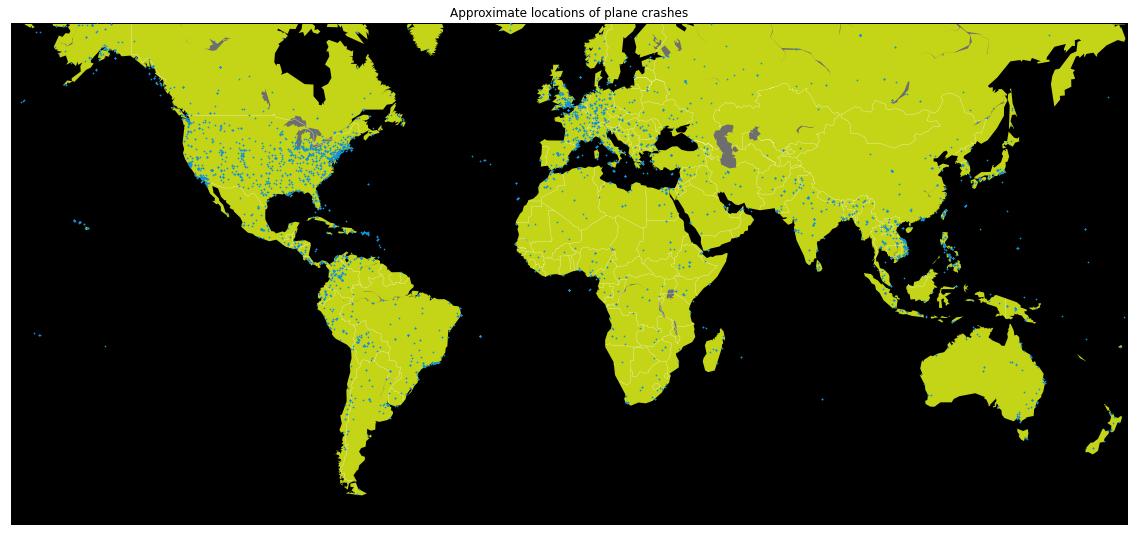

In [ ]:
from mpl_toolkits.basemap import Basemap


locs = [(38.883541, -77.0810889), (39.3642834, -74.4229266), (48.4284207, -123.3656444), (56.511018, 3.515625), (50.2074306, 11.2858917), (50.81057, 4.93622), (53.859336, 8.6879057), (42.48419990000001, 26.5035023), (51.627903, 0.418397), (51.696636, -0.175948), (49.9928617, 8.2472526), (54.691745, -1.212926), (51.0543422, 3.7174243), (50.9415388, 6.9565985), (56.511018, 3.515625), (53.25018439999999, 4.9514271), (45.567631, -92.509514), (48.592237, 6.492338999999999), (28.080721, -81.516285), (53.3641829, 13.0532149), (53.44056399999999, 5.6587659), (40.6639916, -74.2107006), (41.49932, -81.6943605), (40.9064, -77.9395179), (54.978252, -1.61778), (39.2720509, -76.73191609999999), (50.134664, -0.357056), (40.78593310000001, -74.7801645), (41.5033572, -85.8307059), (40.735657, -74.1723667), (40.735657, -74.1723667), (40.0583238, -74.4056612), (41.2916728, -92.6493595), (41.49932, -81.6943605), (52.1359729, -0.4666546), (38.9896967, -76.93776), (40.79676670000001, -74.4815438), (41.4108855, -83.46104), (40.5395289, -76.96081029999999), (42.518487, 3.106592), (39.4699075, -0.3762881), (41.8500284, -88.3125738), (41.0802621, -105.5074905), (51.555684, -0.21396), (41.3850639, 2.1734035), (44.8871878, -93.1643869), (43.8013556, -91.23958069999999), (36.140751, -5.353585), (40.8324211, -115.7631232), (-37.9178086, 144.7477259), (40.7339981, -73.59551499999999), (41.49932, -81.6943605), (41.58746439999999, -109.2029043), (37.7749295, -122.4194155), (43.604652, 1.444209), (53.745365, -0.2956928), (48.856614, 2.3522219), (-36.6016558, 145.2195321), (48.856614, 2.3522219), (36.8507689, -76.28587259999999), (49.665342, 1.939705), (39.206062, 115.04908), (53.411758, -2.317364), (51.081397, 1.169456), (36.5270612, -6.2885962), (39.768403, -86.158068), (45.4408474, 12.3155151), (35.1744271, -6.1473964), (34.0181246, -5.0078451), (41.919229, 8.738635), (41.3850639, 2.1734035), (41.1399814, -104.8202462), (41.6414438, -80.15144839999999), (49.70958, 2.17198), (44.4267674, 26.1025384), (41.4645824, -83.9521687), (51.4308255, -1.1444927), (61.52401, 105.318756), (41.4000523, -82.80852039999999), (34.5531284, 18.0480105), (41.1697041, -104.2568991), (40.9658931, -78.6130821), (50.134664, -0.357056), (11.0041072, -74.80698129999999), (37.09024, -95.712891), (43.545815, 3.125343), (41.5822716, -85.8344383), (51.339228, -0.119711), (41.7235174, 44.74518279999999), (38.3459963, -0.4906855), (38.3459963, -0.4906855), (50.125434, 3.691623), (38.3459963, -0.4906855), (42.2605204, 3.2080991), (47.497912, 19.040235), (39.74785079999999, -81.51651269999999), (48.678296, 5.890159), (40.6792982, -80.8880562), (50.725231, 1.613334), (41.5844951, -84.6055076), (52.5348604, 13.1431864), (50.134664, -0.357056), (14.4803708, 121.0390178), (50.95088, 4.30927), (53.681385, 7.008163), (51.1645846, 0.5529482), (40.7127837, -74.0059413), (51.55092, 8.5597678), (50.134664, -0.357056), (31.791702, -7.092619999999999), (42.3265152, -122.8755949), (50.62925, 3.057256), (33.9715904, -6.8498129), (-24.883333, 146.25), (43.0040661, -115.2039579), (41.5822716, -85.8344383), (50.7562528, 10.4819945), (36.7537703, 3.0587927), (50.797725, 8.9219942), (51.27241000000001, 0.190898), (41.8809434, -72.2600655), (40.5529452, -74.422868), (51.37795000000001, 11.857969), (50.57616650000001, 11.8090005), (21.00789, -10.940835), (40.4862157, -74.4518188), (48.5734053, 7.752111299999999), (59.9124514, 26.2623373), (41.4372721, -85.14719339999999), (36.834047, -2.4637136), (40.46366700000001, -3.74922), (46.227638, 2.213749), (42.9056288, -74.5718073), (-34.7871645, -55.38349669999999), (41.1188827, 1.2444909), (46.227638, 2.213749), (36.834047, -2.4637136), (41.0069471, -98.00966199999999), (-22.9068467, -43.1728965), (50.871091, 1.583382), (38.9176041, -77.04766959999999), (40.46366700000001, -3.74922), (44.7442714, -93.1499651), (51.2015995, 7.3590901), (50.1109221, 8.6821267), (38.4166818, -95.85304409999999), (59.9124514, 26.2623373), (51.339228, -0.119711), (52.132633, 5.291265999999999), (48.11703869999999, -122.7604472), (48.678296, 5.890159), (-34.9284989, 138.6007456), (42.8713032, -112.4455344), (49.69082419999999, 11.0048276), (41.9794005, 2.8214264), (41.3670014, -79.92922329999999), (44.933393, 4.89236), (36.140751, -5.353585), (41.4486619, -84.7480123), (41.3873741, -80.86912730000002), (41.4486619, -84.7480123), (33.4764767, -100.8556857), (-14.235004, -51.92528), (-22.9068467, -43.1728965), (52.4465493, 11.4862361), (41.3950489, -82.55517329999999), (35.0456297, -85.3096801), (49.258329, 4.031696), (41.9542632, -72.3023022), (45.2965256, -117.8079872), (39.6249838, 19.9223461), (39.629526, -79.95589679999999), (31.791702, -7.092619999999999), (40.735657, -74.1723667), (33.9294606, -116.977248), (32.715738, -117.1610838), (47.162494, 19.503304), (36.7537703, 3.0587927), (20.01693, -75.8301537), (41.3850639, 2.1734035), (50.919325, 0.9652799999999999), (44.9537029, -93.0899578), (47.6363377, 9.3892445), (39.9611755, -82.99879419999999), (34.4047987, -103.2052272), (42.6886591, 2.8948332), (43.60280789999999, 39.7341543), (49.2925135, 6.8362203), (34.8480597, -114.6141315), (35.2386491, -107.6081575), (25.6577006, 57.7856677), (35.1744271, -6.1473964), (32.61768, -116.1874241), (41.58065420000001, -72.7567636), (44.2447913, 9.7678687), (40.3933956, -82.4857181), (47.5673202, -122.6329356), (20.403852, -97.2878798), (51.247571, -0.067578), (42.0396042, 9.012892599999999), (45.6387281, -122.6614861), (41.4298516, -81.3910999), (34.5531284, 18.0480105), (52.52000659999999, 13.404954), (35.2219971, -101.8312969), (41.1874828, -103.1129824), (-18.8791902, 47.5079055), (33.1958696, -117.3794834), (35.8893874, -5.3213455), (39.114053, -94.6274636), (41.76371109999999, -72.6850932), (51.173613, 0.490709), (40.72815749999999, -74.0776417), (-34.6036844, -58.3815591), (42.3600825, -71.0588801), (55.160428, 14.8668836), (27.9094677, -97.1499898), (14.4803708, 121.0390178), (51.376165, -0.098234), (56.6461641, -103.2517784), (49.42953869999999, 2.0807123), (51.0504088, 13.7372621), (35.1744271, -6.1473964), (54.3150367, -130.3208187), (49.732771, 1.441891), (40.6028144, -86.86723390000002), (-23.9678823, -46.3288865), (34.95, -118.58), (31.230416, 121.473701), (51.0036598, 3.8003144), (45.7423372, -122.1900892), (-39.035173, 177.4180311), (49.968341, -98.62895700000001), (40.46366700000001, -3.74922), (-31.2532183, 146.921099), (38.2719604, -96.53528539999999), (51.165691, 10.451526), (34.1808392, -118.3089661), (-25.274398, 133.775136), (40.91339430000001, -77.7783348), (18.4671203, 94.34110009999999), (41.5878281, -83.4932651), (49.24015720000001, 6.996932699999999), (41.8781136, -87.6297982), (-34.4450316, 147.5360981), (38.5285169, -89.1316944), (42.733883, 25.48583), (39.1031182, -84.5120196), (41.8781136, -87.6297982), (37.8043637, -122.2711137), (44.68198659999999, -63.744311), (-14.235004, -51.92528), (39.9259463, -75.1196199), (-34.11937959999999, 18.9084618), (40.7607793, -111.8910474), (36.651216, 117.12), (46.2395793, -119.1005657), (41.2455927, -89.9248303), (13.7563309, 100.5017651), (36.7537703, 3.0587927), (39.9242266, -83.8088171), (42.13806, -88.78332999999999), (34.8416435, -118.8648189), (25.7616798, -80.1917902), (42.0258779, -85.81555759999999), (38.1557502, -121.6913439), (-22.9674264, -43.7056394), (38.6270025, -90.19940419999999), (34.0039039, -117.0619755), (40.3697905, -80.63396379999999), (34.80207499999999, 38.996815), (41.3931096, -81.5365094), (41.079273, -85.1393513), (45.5230622, -122.6764816), (34.1808392, -118.3089661), (-33.4035551, -70.5688043), (33.8937913, 35.5017767), (48.5216364, 9.0576448), (31.7437272, -105.0927275), (51.3495019, -0.04285129999999999), (-28.6473671, 153.601977), (20.9425179, -17.0362272), (-13.75, -65.316667), (51.335545, 1.419895), (51.165691, 10.451526), (34.7737082, -90.7576112), (35.2219971, -101.8312969), (37.2438888, -108.6216666), (-27.5765485, 152.939753), (36.7537703, 3.0587927), (40.735657, -74.1723667), (33.95260200000001, -84.5499327), (29.79466409999999, -98.7319703), (44.0520691, -123.0867536), (-32.8894587, -68.8458386), (37.6688205, -122.0807964), (51.033331, 2.8658393), (52.2280802, 10.706471), (39.76492229999999, -74.2693297), (38.5668641, 14.5716691), (47.8677574, 12.6384037), (41.84777649999999, 2.3904096), (38.0495789, -77.3466468), (34.9339503, -103.7605204), (46.0569465, 14.5057515), (41.6105937, -87.06419919999999), (47.642833, 6.675242), (45.5230622, -122.6764816), (34.9900503, -106.0491893), (36.651216, 117.12), (49.988371, 36.311532), (41.4361548, -88.7734493), (53.5510846, 9.9936818), (-28.8946769, 31.4627576), (51.0413098, 3.3970513), (47.257618, 3.684328), (44.110898, 5.107716), (40.7607793, -111.8910474), (35.2908448, -2.9472191), (40.0117151, -89.8481652), (4.8087174, -75.690601), (-12.046374, -77.0427934), (27.9661349, 120.5893348), (50.134664, -0.357056), (51.376165, -0.098234), (41.9909235, -74.68404559999999), (-34.5885499, -60.94955400000001), (53.3765873, 13.3133008), (34.1808392, -118.3089661), (34.1083449, -117.2897652), (47.98233159999999, 8.8192095), (-12.579738, -41.7007272), (29.868336, 121.54399), (39.8861052, -94.891913), (-22.3913, 143.0381), (-39.1086169, 145.6689636), (-25.274398, 133.775136), (-23.4421917, 144.2555041), (-34.87544949999999, 150.5298387), (46.320207, -112.1072224), (53.8992685, 13.6468979), (38.9517053, -92.3340724), (20.2218201, -75.9869609), (34.80207499999999, 38.996815), (36.2431964, -84.6715407), (40.44062479999999, -79.9958864), (53.4285438, 14.5528116), (51.165691, 10.451526), (31.132093, 33.8032762), (50.1715288, 8.7189606), (49.42953869999999, 2.0807123), (51.3982179, 8.5749432), (37.6241793, -104.7802645), (39.898646, -92.4810208), (43.0125274, -83.6874562), (55.755826, 37.6173), (42.5027467, -105.0260832), (41.8791979, -87.8431155), (15.1202795, -88.4016041), (6.253040800000001, -75.5645737), (52.3702157, 4.895167900000001), (32.3546679, -89.3985283), (46.4181055, 9.225458699999999), (35.86166, 104.195397), (32.7287472, -94.94243790000002), (42.5027467, -105.0260832), (64.2008413, -149.4936733), (34.1808392, -118.3089661), (-38.2700243, 144.6474729), (41.1399814, -104.8202462), (59.9124514, 26.2623373), (42.7284117, -73.69178509999999), (41.1399814, -104.8202462), (-11.7910581, -38.35625539999999), (14.6572108, -86.21076719999999), (32.7554883, -97.3307658), (43.513006, 4.987968), (47.394144, 0.68484), (51.376165, -0.098234), (50.3180199, 11.933824), (31.2000924, 29.9187387), (34.9381496, -91.0209529), (-19.1056985, -61.700565), (41.919229, 8.738635), (33.2148412, -97.13306829999999), (-14.5994134, -28.6731465), (25.311888, 101.492853), (19.1223754, -98.7667481), (42.8761123, -78.0228829), (39.900076, -79.71643259999999), (10.6549013, -61.50192559999999), (45.070312, 7.686856499999999), (46.818188, 8.227511999999999), (49.205164, 2.583212), (47.5595986, 7.5885761), (-37.877, 145.131), (55.604981, 13.003822), (52.3758916, 9.732010400000002), (61.1749982, 5.2144952), (40.6051035, -73.6279072), (43.490103, 2.376579), (23.634501, -102.552784), (38.6270025, -90.19940419999999), (5.2528033, -76.8259652), (50.6841495, 7.636579199999999), (39.074208, 21.824312), (50.134664, -0.357056), (37.6241793, -104.7802645), (41.7508391, -88.1535352), (23.634501, -102.552784), (50.87848109999999, 10.5115698), (55.755826, 37.6173), (49.45203, 11.07675), (51.5073509, -0.1277583), (45.188529, 5.724524), (33.591215, -7.676711500000001), (51.376165, -0.098234), (40.7607793, -111.8910474), (47.5382565, -116.1193327), (41.322316, -74.8023882), (32.7766642, -96.79698789999999), (32.060255, 118.796877), (34.373361, -118.5400404), (34.373361, -118.5400404), (35.6976541, -0.6337376), (37.7749295, -122.4194155), (-28.3333333, 153), (-33.4192822, 149.5775008), (46.231418, 4.593407), (41.2509919, -75.5393155), (51.165691, 10.451526), (40.014561, -74.3112574), (48.7758459, 9.1829321), (34.193415, -77.8344829), (50.73757, 4.23251), (21.7991419, 31.3713164), (9.350598999999999, -79.901527), (22.6166667, 114.6702778), (29.2108147, -81.0228331), (-33.3017267, -66.3377522), (-27.5765485, 152.939753), (39.074208, 21.824312), (-2.9760735, 104.7754307), (40.7346687, -110.8437819), (49.4874592, 8.466039499999999), (51.21543, 2.928656), (51.376165, -0.098234), (40.6327278, 17.9417616), (43.74980499999999, 1.400246), (14.4803708, 121.0390178), (50.1109221, 8.6821267), (45.6769979, -111.0429339), (-14.33166, -170.711503), (45.8211405, -81.9421524), (32.9028812, -118.4980744), (67.1700511, 32.4229656), (43.296482, 5.36978), (25.6775595, -100.2596935), (49.050966, 2.100645), (37.5368803, -119.6562684), (25.6653262, 78.46093929999999), (-37.633, 144.95), (42.466095, 2.578342), (41.2559961, 13.6068672), (19.3126928, -99.040554), (-36.9686277, 174.7936872), (34.4113854, -118.5400858), (-23.5505199, -46.63330939999999), (41.49932, -81.6943605), (51.165691, 10.451526), (49.230707, -124.8603738), (-6.2555679, 29.5107708), (-31.9791666, -70.1125), (45.7832856, -108.5006904), (40.1208752, 9.012892599999999), (45.943161, 24.96676), (4.710988599999999, -74.072092), (-0.0917016, 34.7679568), (13.444304, 144.793731), (32.2780642, 130.2191303), (47.5316049, 21.6273123), (54.3232927, 10.1227652), (-26.3204885, -48.8255373), (44.4267674, 26.1025384), (40.6353493, 17.8772696), (35.86166, 104.195397), (-17.5226261, 146.0285223), (-33.4192822, 149.5775008), (46.65698709999999, 9.578025700000001), (51.5711476, 8.105754), (-37.831111, 145.36), (51.105097, -2.9262307), (40.6051035, -73.6279072), (52.3076865, 4.767424099999999), (50.4452112, -104.6188944), (-33.4192822, 149.5775008), (33.3128057, 44.3614875), (38.0690894, -122.8069356), (36.52909100000001, 138.9738577), (52.3702157, 4.895167900000001), (-12.4634403, 130.8456418), (48.856614, 2.3522219), (46.4083362, -105.8405582), (-22.9068467, -43.1728965), (-14.4521139, 132.2715145), (34.5531284, 18.0480105), (50.89229049999999, 4.4176727), (5.255906, -75.1538939), (40.9653217, -74.0519917), (35.4675602, -97.5164276), (31.6294723, -7.981084500000001), (-18.665695, 35.529562), (31.6294723, -7.981084500000001), (-2.1709979, -79.9223592), (51.4536672, 3.5709125), (47.6779496, 9.173238399999999), (41.3850639, 2.1734035), (-22.9068467, -43.1728965), (55.6760968, 12.5683371), (31.55460609999999, 74.3571581), (52.3758916, 9.732010400000002), (56.511018, 3.515625), (50.794995, -1.117547), (36.140751, -5.353585), (35.8582865, 14.4868883), (31.5084926, -9.7595041), (-8.670458199999999, 115.2126293), (24.7142573, 58.73736339999999), (56.1113678, -4.6288602), (33.9191799, -118.4164652), (58.595272, 25.013607), (49.276656, -0.258658), (19.75, 107.75), (52.3758916, 9.732010400000002), (-35.2809368, 149.1300092), (46.7712101, 23.6236353), (39.2726017, -77.636657), (36.85882, 119.398525), (52.52000659999999, 13.404954), (40.9180005, -111.8721601), (51.2803993, 14.0373888), (-22.9068467, -43.1728965), (34.5531284, 18.0480105), (41.8781136, -87.6297982), (-30.559482, 22.937506), (47.04650050000001, 21.9189438), (18.7326212, 100.8846633), (37.94094219999999, -93.4010371), (50.296741, -89.058273), (33.7489954, -84.3879824), (63.4305149, 10.3950528), (-32.3134951, 18.350464), (-14.5994134, -28.6731465), (44.4267674, 26.1025384), (38.848848, 135), (55.5806165, -5.2108573), (55.458564, -4.629179000000001), (-23.5505199, -46.63330939999999), (46.227638, 2.213749), (55.424117, -5.605373999999999), (18.4655394, -66.1057355), (46.8737648, -96.76780389999999), (42.7777214, -81.18265269999999), (25.7616798, -80.1917902), (36.1699412, -115.1398296), (1.4748305, 124.8420794), (-0.4948232, 117.1436154), (-10.1771997, 123.6070329), (-10.1771997, 123.6070329), (50.3754565, -4.1426565), (-27.5, 153.133333), (-33.137551, 81.826172), (-17.9614336, 122.235852), (-15.4825, 128.122778), (24.880095, 102.832892), (-13.823056, 131.833333), (40.7607793, -111.8910474), (46.4083362, -105.8405582), (37.4223352, -81.64371969999999), (-28.7264578, 153.5983166), (52.38102, -3.117897), (36.7537703, 3.0587927), (37.1694632, -104.5005407), (50.8551491, 0.5630741), (58.250685, -3.433149), (35.5122222, 3.9916667), (24.880095, 102.832892), (18.0787363, -66.35870560000001), (49.1422983, -55.3440853), (33.8302961, -116.5452921), (60.47202399999999, 8.468945999999999), (40.2621714, -112.0929961), (48.2081743, 16.3738189), (38.7222524, -9.1393366), (5.8, -53.9666667), (-14.5994134, -28.6731465), (39.1501709, -123.2077831), (-15.74447, -73.871483), (48.954408, -54.6103488), (47.6062095, -122.3320708), (38.7222524, -9.1393366), (28.46763, 119.922796), (28.5983159, 83.9310623), (-27.5717321, 153.012126), (-9.4301515, 147.1914623), (49.3215322, 0.0026356), (34.81516330000001, -79.18309099999999), (-21.1446586, 149.1682653), (15.5006544, 32.5598994), (15.5006544, 32.5598994), (36.140751, -5.353585), (53.1938062, -6.1188074), (36.7853194, -86.3533242), (44.936664, 26.0128616), (-19.2589635, 146.8169483), (35.86166, 104.195397), (56.511018, 3.515625), (-22.9068467, -43.1728965), (29.3013479, -94.7976958), (34.7351614, -79.3489317), (22.572646, 88.36389500000001), (35.77895650000001, -87.46695869999999), (48.497109, -68.247412), (60.12816100000001, 18.643501), (32.4609764, -84.9877094), (18.5204303, 73.8567437), (24.880095, 102.832892), (24.880095, 102.832892), (-9.4301515, 147.1914623), (47.549255, 131.6769706), (-22.9779158, 150.2743921), (40.653788, -112.7625703), (44.7891785, 20.4418579), (35.1495343, -90.0489801), (35.86166, 104.195397), (38.5236036, 23.8584737), (-5.0122202, 141.3470159), (64.5011111, -165.4063889), (44.7891785, 20.4418579), (59.22053689999999, 10.9347012), (45.5016889, -73.567256), (35.86166, 104.195397), (22.572646, 88.36389500000001), (49.305666, -1.242834), (49.53207, -1.865804), (49.383333, 0.183333), (24.880095, 102.832892), (25.234479, 110.179954), (-30.0346471, -51.2176584), (-14.5994134, -28.6731465), (54.723977, -4.956053), (-8.5200657, 179.198128), (42.96361, -99.09676259999999), (20.8325254, -75.7284267), (52.321924, 1.5985), (53.753825, -2.868558), (55.495587, -4.6142139), (-23.5505199, -46.63330939999999), (44.7891785, 20.4418579), (-16.45, 145.373333), (64.2008413, -149.4936733), (-7.9661053, -34.8322058), (47.322047, 5.04148), (27.860175, 95.62739510000002), (44.442493, 18.1726501), (-33.8688197, 151.2092955), (59.39139849999999, 8.321121), (47.162494, 19.503304), (53.38999099999999, -3.023009), (36.3274502, -119.6456844), (59.4836751, 8.6269273), (50.87387200000001, 0.00878), (14.45411, -87.0624261), (-0.023559, 37.906193), (55.604981, 13.003822), (27.5584428, 95.2710558), (34.1898566, -118.451357), (-14.5994134, -28.6731465), (50.134664, -0.357056), (27.5584428, 95.2710558), (10.6549013, -61.50192559999999), (34.1808392, -118.3089661), (35.86166, 104.195397), (24.880095, 102.832892), (-9.862794599999999, 124.3310364), (-37.0012974, 144.4937398), (43.1306661, 11.0160694), (53.1586694, 0.2369247), (37.8043637, -122.2711137), (-19.6303019, -43.89830310000001), (33.5731104, -7.589843399999999), (36.8348383, -81.5148368), (-23.849784, 151.2639294), (24.880095, 102.832892), (39.629526, -79.95589679999999), (-31.9505269, 115.8604572), (32.4709519, -100.4059384), (48.1351253, 11.5819806), (52.3555177, -1.1743197), (38.9071923, -77.0368707), (-2.0941169, 146.8760951), (51.113618, -0.732073), (49.69779699999999, 2.788831), (-5.0122202, 141.3470159), (4.915829899999999, -6.1540241), (35.86166, 104.195397), (-28.7773715, 114.6149715), (50.608277, -1.960769), (12.9715987, 77.5945627), (31.9685988, -99.9018131), (-14.5994134, -28.6731465), (-0.0917016, 34.7679568), (34.1954331, -79.7625625), (40.7127837, -74.0059413), (22.1564699, -100.9855409), (14.6160647, -61.0587804), (19.3898592, -99.1352383), (34.1954331, -79.7625625), (-5.0122202, 141.3470159), (43.3439296, -101.0681058), (-6.314992999999999, 143.95555), (35.86166, 104.195397), (28.0394654, -81.9498042), (51.2966867, -0.8693995), (48.117266, -1.6777926), (50.91535, 4.4787175), (39.904211, 116.407395), (-14.5994134, -28.6731465), (23.12911, 113.264385), (20.593684, 78.96288), (-6.4824784, -76.3726891), (35.86166, 104.195397), (48.7986201, 8.4400257), (25.4263309, 83.1179848), (27.8005828, -97.39638099999999), (45.8459562, 12.3184727), (41.648291, 13.866845), (31.8671891, 10.9856254), (-24.791488, -65.4499197), (-5.7465904, 150.7679216), (51.5961189, 0.4489254), (45.936698, -0.9616969999999999), (29.5844524, -81.20786989999999), (45.7832856, -108.5006904), (59.9800595, 10.6653012), (4.3946735, 18.5581899), (40.7127837, -74.0059413), (33.5206608, -86.80248999999999), (43.817072, 125.323544), (43.296482, 5.36978), (41.5083668, -72.9106202), (49.5908749, -114.523843), (48.00611000000001, 0.199556), (41.6893961, -106.4140868), (9.7150631, 122.8986812), (46.23824, -63.13107040000001), (32.6906137, -116.334462), (50.0754452, 14.4140315), (-42.8821377, 147.3271949), (32.060255, 118.796877), (31.230416, 121.473701), (39.4004621, -120.183811), (-33.137551, 81.826172), (35.8854994, 14.373372), (39.63086699999999, 118.180194), (12.2153659, -85.1660825), (20.593684, 78.96288), (30.85067, -86.87483999999999), (37.5407246, -77.4360481), (59.9138688, 10.7522454), (40.6340026, 14.6026805), (7.1453088, 3.3590446), (8.787191199999999, -79.55753419999999), (46.568114, 4.6824329), (43.2951, -0.370797), (42.2042586, -72.6162009), (40.3356483, -75.9268747), (36.651216, 117.12), (-2.9001285, -79.00589649999999), (39.350833, -101.7101722), (30.169012, -85.75287829999999), (16.7753609, 94.7381013), (59.9138688, 10.7522454), (40.014561, -74.3112574), (35.8582865, 14.4868883), (49.44323199999999, 1.099971), (41.5067003, -90.51513419999999), (30.0444196, 31.2357116), (55.341539, 12.405246), (48.936752, 2.425377), (40.8324211, -115.7631232), (-33.4192822, 149.5775008), (64.5011111, -165.4063889), (49.1390842, -102.9914807), (50.8503396, 4.3517103), (48.954408, -54.6103488), (32.8872094, 13.1913383), (35.86166, 104.195397), (22.308047, 113.9184808), (-7.9661053, -34.8322058), (48.5479718, -58.5815353), (4.0022157, 101.0159501), (52.21115700000001, 5.9699231), (41.1399814, -104.8202462), (33.8305244, -4.835315400000001), (41.3113669, -105.5911007), (22.1834038, 72.9419965), (26.820553, 30.802498), (46.029218, 1.418574), (41.49932, -81.6943605), (34.8416435, -118.8648189), (19.492, -97.14999999999999), (52.3702157, 4.895167900000001), (59.8056059, -146.3786899), (9.9280694, -84.0907246), (-34.6266731, -58.5943604), (36.2604623, 59.6167549), (46.4398305, -122.846783), (34.6937378, 135.5021651), (14.0675, 121.4925), (21.4691137, -78.6568942), (-22.9068467, -43.1728965), (32.715738, -117.1610838), (31.230416, 121.473701), (41.70753939999999, -86.8950297), (39.07088, -89.61897839999999), (52.7124708, -8.873067599999999), (-23.5505199, -46.63330939999999), (39.4342818, -75.1212927), (36.067108, 120.382609), (18.1960128, 120.5926679), (51.075215, 1.025608), (36.6612387, -80.9239671), (19.0412967, -98.20619959999999), (6.51669, -74.09996), (29.56301, 106.551556), (51.376165, -0.098234), (22.396428, 114.109497), (55.6760968, 12.5683371), (32.0547771, 118.7686301), (38.7222524, -9.1393366), (38.9237244, -75.5777033), (40.24260719999999, -4.9097818), (39.7392358, -104.990251), (41.2963728, 13.2332657), (4.710988599999999, -74.072092), (29.56301, 106.551556), (0, 0), (6.619519899999999, -75.97225999999999), (40.7379299, 13.9486184), (46.227638, 2.213749), (6.253040800000001, -75.5645737), (7.200796799999999, 79.8736754), (10.4805937, -66.90360629999999), (14.7645042, -17.3660286), (32.4609764, -84.9877094), (49.2827291, -123.1207375), (39.1201705, -75.2479061), (66.1534796, -18.7519095), (35.4430818, 139.3624889), (40.7769271, -73.8739659), (39.6048327, -76.11522889999999), (43.295388, 5.628112), (-34.6462173, -58.42902379999999), (39.1156615, -77.56360149999999), (35.0160783, 40.44654), (0, 0), (28.0836269, -80.60810889999999), (46.131859, 3.425488), (32.427908, 53.688046), (-34.6558611, -58.6167212), (40.29184300000001, 97.04567899999999), (-27.7882061, -64.2739241), (59.8056059, -146.3786899), (40.7127837, -74.0059413), (55.604981, 13.003822), (44.4267674, 26.1025384), (38.3730379, -110.7140391), (26.7505337, 51.6834275), (68.7986342, 16.5414503), (31.7618778, -106.4850217), (35.3737111, -83.22598029999999), (37.6256827, -0.9965839), (37.6283161, -112.1676947), (55.12092939999999, -131.4855123), (37.9463889, 23.8166667), (34.0836708, 74.7972825), (14.5377516, 121.0013794), (35.5280783, -108.7425843), (50.035896, 2.02821), (40.6491886, 14.6117112), (39.5392979, -75.667356), (44.2785962, 28.6177131), (59.54694439999999, -139.7272222), (14.4832373, 121.0213813), (45.5990565, 7.940853499999999), (47.6062095, -122.3320708), (33.0092216, -80.10517089999999), (35.1495343, -90.0489801), (24.880095, 102.832892), (16.7967121, 82.22528989999999), (21.1250077, -101.6859605), (48.856614, 2.3522219), (51.5758719, -0.421236), (32.0835407, -81.09983419999999), (36.5662811, 3.5913939), (18.735693, -70.162651), (38.80331779999999, -76.98972780000001), (41.805699, 123.431472), (36.778261, -119.4179324), (32.3078, -64.7505), (30.3321838, -81.65565099999999), (50.5760021, 9.1929424), (43.5915707, 10.4756991), (49.472447, -1.289561), (7.190708, 125.455341), (39.9611755, -82.99879419999999), (-1.4557549, -48.4901799), (42.6886591, 2.8948332), (51.4700223, -0.4542955), (64.963051, -19.020835), (41.8781136, -87.6297982), (62.21388889999999, -144.1288889), (-14.235004, -51.92528), (5.215209, -73.5946249), (42.230243, 9.119824999999999), (52.52000659999999, 13.404954), (52.7124708, -8.873067599999999), (0, 0), (42.83661, 2.665048), (-27.452382, 29.1506941), (39.9611755, -82.99879419999999), (51.723391, -0.534632), (38.994349, -1.8585424), (54.236107, -4.548056), (40.7970312, -76.41189609999999), (10.6035234, -66.99284399999999), (51.0057936, 4.6320416), (51.5209866, -0.4159848), (0, 0), (-1.4557549, -48.4901799), (22.198745, 113.543873), (48.865149, -64.210583), (-34.6036844, -58.3815591), (36.067108, 120.382609), (-14.5994134, -28.6731465), (24.8614622, 67.0099388), (-41.2990517, 174.1124665), (10.587508, -66.9213628), (44.0553908, -91.6663523), (40.5489742, -76.811915), (-31.508056, 150.68), (63.4305149, 10.3950528), (55.5089021, -4.6109806), (-39.2817207, 175.5685104), (53.544389, -113.4909267), (53.4433284, -1.948907), (58.21138889999999, -136.6483333), (-37.4, 144.583333), (53.4083714, -2.9915726), (30.0452462, 72.3488721), (35.86166, 104.195397), (45.4654219, 9.1859243), (25.0329694, 121.5654177), (4.710988599999999, -74.072092), (36.91307560000001, 21.6963472), (22.3156377, 114.365341), (40.4167754, -3.7037902), (18.4655394, -66.1057355), (41.87194, 12.56738), (47.6062095, -122.3320708), (-23.0011932, -44.3019383), (38.6967833, -76.8477485), (-31.7653989, -52.3375886), (31.206074, 29.881599), (18.3568552, -64.8988454), (40.5815489, -74.0960875), (56.170641, -4.900365), (59.64250000000001, -151.5483333), (40.8256561, -73.69818579999999), (48.3677441, -53.35873609999999), (26.3351, 17.228331), (3.650676, -76.85063699999999), (55.6760968, 12.5683371), (-9.9298454, -76.24326529999999), (52.406822, -1.519693), (22.2833333, 114.2), (-13.53195, -71.96746259999999), (-28.166667, 153.533333), (52.52000659999999, 13.404954), (-40.8755143, 175.0667946), (45.0769607, 7.7680241), (0, 0), (39.074208, 21.824312), (-27.5953778, -48.5480499), (18.4655394, -66.1057355), (41.1171432, 16.8718715), (-33.8558528, 150.9948543), (19.0759837, 72.8776559), (34.2506356, -118.61481), (47.6062095, -122.3320708), (40.1219081, -74.651754), (-28.8815983, -50.36418030000001), (-1.4080136, -48.4445409), (-1.3214443, -78.5788601), (17.0506675, 54.1065864), (4.710988599999999, -74.072092), (53.3503103, -6.2719649), (53.5409298, -2.1113659), (53.6948733, -95.6765487), (-4.4419311, 15.2662931), (49.2768822, -69.9596138), (19.0224223, -98.62790129999999), (-34.6123945, -59.90200669999999), (41.1399814, -104.8202462), (37.780411, -25.4970466), (38.8799697, -77.1067698), (41.0814447, -81.51900529999999), (59.9138688, 10.7522454), (45.5856077, 4.998507), (32.7766642, -96.79698789999999), (-14.235004, -51.92528), (38.1040864, -122.2566367), (36.061089, 103.834304), (20.044002, 110.198293), (24.8538097, 67.775756), (38.9071923, -77.0368707), (18.8504744, -97.1036396), (48.9412151, 2.4970711), (30.375321, 69.34511599999999), (38.994349, -1.8585424), (-17.5790302, -65.5796972), (-18.1442811, 49.3957836), (10.7201501, 122.5621063), (62.399237, -140.371697), (56.511018, 3.515625), (50.0754452, 14.4140315), (44.977753, -93.2650108), (10.8230989, 106.6296638), (51.48158100000001, -3.17909), (39.9333635, 32.8597419), (44.63821, -1.250625), (22.6034621, 88.4476565), (9.322961, -74.570544), (35.4430818, 139.3624889), (-2.0268289, -78.74762079999999), (38.75388, -27.0869431), (33.6890603, -78.8866943), (1.2058837, -77.285787), (40.8598219, -74.0593075), (-14.7935051, -39.0463797), (27.6648274, -81.5157535), (10.886123, -72.85151499999999), (26.0667, 50.5577), (26.0667, 50.5577), (42.1167065, -86.45418939999999), (-31.8738101, 116.7774281), (35.1795543, 129.0756416), (33.5731104, -7.589843399999999), (32.2643375, 75.64211209999999), (-12.46388, 14.16529), (36.204824, 138.252924), (-30.0346471, -51.2176584), (28.033886, 1.659626), (38.24935809999999, -122.0399663), (5.0902778, 101.7663889), (30.43356, 30.2426185), (43.100903, -75.232664), (35.6891975, 51.3889736), (9.1898235, 167.4242972), (45.8150108, 15.981919), (59.4021806, 13.5114977), (32.6453356, 130.958688), (33.5731104, -7.589843399999999), (45.49135, -92.7854919), (51.5073509, -0.1277583), (51.4700223, -0.4542955), (45.8717628, 6.894019399999999), (46.0038232, -112.5347776), (44.775122, 5.839061), (-7.2574719, 112.7520883), (43.0759678, -107.2902839), (-13.53195, -71.96746259999999), (27.514162, 90.433601), (29.6155598, 52.4981131), (46.227638, 2.213749), (4.3946735, 18.5581899), (20.593684, 78.96288), (-23.3044524, -51.1695824), (9.3191109, -70.60329949999999), (16.4023332, 120.5960071), (49.4991381, -119.5937077), (-27.7833574, -64.264167), (-30.1531579, 30.0694123), (6.1, 101.1333333), (39.9525839, -75.1652215), (47.6696057, -117.8777336), (42.0924239, 11.7954132), (23.69781, 120.960515), (64.02910539999999, -21.9684626), (38.7216415, -27.2205771), (9.081999, 8.675277), (6.675199999999999, -74.84211), (42.4999942, -96.40030689999999), (22.267902, 114.2111864), (9.321697000000002, -75.294467), (41.4036007, -95.0138776), (-27.5953778, -48.5480499), (-53.7860374, -67.7002243), (4.710988599999999, -74.072092), (34.4437094, -119.7247661), (38.3498195, -81.6326234), (22.208065, 114.260281), (24.5550593, -81.7799871), (41.079273, -85.1393513), (35.0853336, -106.6055534), (44.837789, -0.57918), (-22.2302991, -50.8950739), (33.4598415, -94.4154787), (-22.9068467, -43.1728965), (6.253040800000001, -75.5645737), (6.428055, -9.429499000000002), (45.3270631, 14.442176), (40.3427932, -105.6836389), (26.6528495, 92.7925592), (-10.9472468, -37.0730823), (52.3555177, -1.1743197), (34.193415, -77.8344829), (35.86166, 104.195397), (57.0530556, -135.33), (16.2639807, -0.0279867), (-17.4139766, -66.1653224), (-43.0988574, 147.7320958), (48.83975700000001, 1.165705), (-23.4336578, -45.0838481), (37.579476, -122.0246772), (-23.5505199, -46.63330939999999), (37.48521520000001, -122.2363548), (39.5341789, 2.8577105), (12.9715987, 77.5945627), (-16.489689, -68.11929359999999), (20.3402389, -102.2083074), (-30.030286, 29.6035495), (41.4036007, -95.0138776), (49.1497222, -124.0511111), (41.9973462, 21.4279956), (16.9181251, -89.8926065), (35.171723, -103.7249662), (45.7124142, 3.0155825), (51.7592485, 19.4559833), (30.0444196, 31.2357116), (22.572646, 88.36389500000001), (47.3768866, 8.541694), (16.8070694, -98.7350079), (39.7392358, -104.990251), (-6.314992999999999, 143.95555), (40.6639916, -74.2107006), (35.6891975, 51.3889736), (42.2525629, -78.80558959999999), (64.8377778, -147.7163889), (33.4483771, -112.0740373), (22.572646, 88.36389500000001), (-14.658228, 49.6452092), (52.1306607, -3.7837117), (53.243025, -131.820879), (40.6639916, -74.2107006), (-5.0487359, 18.7838572), (35.3322177, 139.1505999), (40.6639916, -74.2107006), (37.598557, 13.2907835), (3.8480325, 11.5020752), (21.1458004, 79.0881546), (-18.9146078, -48.2753801), (43.7101728, 7.261953200000001), (10.3156992, 123.8854366), (29.5688411, -97.9647269), (48.8316351, -64.4869016), (50.1109221, 8.6821267), (36.7598084, 3.0626481), (55.755826, 37.6173), (10.3401921, -68.74530639999999), (16.4023332, 120.5960071), (40.7127837, -74.0059413), (36.204824, 138.252924), (23.831457, 91.2867777), (18.4655394, -66.1057355), (33.9791793, -118.032844), (-7.336239, -47.4638414), (28.7040592, 77.10249019999999), (59.2089131, 9.605752599999999), (4.597479, 101.090106), (-23.5505199, -46.63330939999999), (-3.1190275, -60.0217314), (20.5072923, -13.052978), (58.48795200000001, 19.863281), (52.38994, 0.537442), (55.3337678, -1.5844757), (-22.9068467, -43.1728965), (-16.8078452, -49.9198367), (38.0176177, 12.537202), (32.630728, 73.01176650000001), (13.1234679, 32.650351), (51.2868939, -0.7526149999999999), (9.234439499999999, -78.19262499999999), (21.7991419, 31.3713164), (56.49067119999999, -4.2026458), (-14.235004, -51.92528), (37.751853, 128.8760574), (35.1982836, -111.651302), (13.330266, 14.1001326), (47.186469, -122.457878), (37.566535, 126.9779692), (61.2180556, -149.9002778), (45.943568, -108.3423516), (61.2422222, -148.1933333), (47.2528768, -122.4442906), (42.6977082, 23.3218675), (32.3658167, -64.7005543), (47.1301417, -119.2780771), (25.7616798, -80.1917902), (10.4805937, -66.90360629999999), (35.6891975, 51.3889736), (24.4458333, 118.3761111), (54.59728500000001, -5.93012), (47.5301011, -122.0326191), (42.0371544, -111.395956), (37.3110897, 13.5765475), (39.30287939999999, 9.198013399999999), (53.1355091, -57.6604364), (20.690696, 101.9861694), (44.885793, -0.6488149999999999), (30.0444196, 31.2357116), (30.6953657, -88.0398912), (24.8614622, 67.0099388), (41.9242917, -72.6454469), (24.3268117, 92.0126276), (16.0544068, 108.2021667), (48.1364139, -53.61288949999999), (37.5875059, -122.0657543), (-23.5492651, -46.9331962), (-6.2555679, 29.5107708), (18.0178743, -76.8099041), (-19.5354306, 45.46157849999999), (26.1445169, 91.7362365), (47.37565780000001, -121.8684444), (21.0277644, 105.8341598), (37.6909682, -122.3107517), (22.9867569, 87.8549755), (50.9946057, -4.5338098), (28.6139391, 77.2090212), (54.3150367, -130.3208187), (32.5448714, -94.36741839999999), (52.3702157, 4.895167900000001), (-27.3665763, -70.3321587), (37.7799273, -121.9780153), (0, 0), (-23.5505199, -46.63330939999999), (35.7090259, 139.7319925), (0, 0), (30.6324149, -87.03968809999999), (40.9676726, 126.5990916), (39.89846199999999, 32.875086), (25.3223269, 55.5136433), (54.2170944, -9.2158713), (32.715738, -117.1610838), (44.3863, 6.650462999999999), (46.8451007, -122.6562348), (14.22246, -88.549629), (21.0961842, -89.5756987), (42.6525793, -73.7562317), (39.9333635, 32.8597419), (38.2526647, -85.7584557), (50.1109221, 8.6821267), (22.3686613, 103.3119085), (25.6866142, -100.3161126), (40.7127837, -74.0059413), (37.4635519, -122.4285862), (-19.5722805, -65.7550063), (54.8826778, -1.6003726), (40.46366700000001, -3.74922), (21.1458004, 79.0881546), (15.7390247, -88.59554179999999), (16.616667, 145.616667), (47.3768866, 8.541694), (34.80207499999999, 38.996815), (34.352865, 62.20402869999999), (40.345477, 26.6843049), (51.80324419999999, -0.6016020999999999), (42.7781867, 10.1927389), (5.070275, -75.5138166), (33.7700504, -118.1937395), (41.9027835, 12.4963655), (50.0754452, 14.4140315), (39.0997265, -94.5785667), (43.06461470000001, 141.3468074), (61.48691640000001, -150.6544934), (36.0442999, 14.2512221), (28.6139391, 77.2090212), (43.75188319999999, -105.4913345), (44.2555539, 6.925440999999999), (1.3087643, 103.8728273), (-21.1424956, 149.1821469), (38.8317815, -76.611351), (25.6866142, -100.3161126), (36.9914194, 35.3308285), (21.0277644, 105.8341598), (38.803377, 15.2326454), (50.3915811, -105.5348562), (-33.4488897, -70.6692655), (19.6093003, 103.7289167), (-29.4097101, -66.892833), (22.572646, 88.36389500000001), (-40.9142336, 175.0083802), (-14.235004, -51.92528), (46.5546503, 15.6458812), (-23.5505199, -46.63330939999999), (16.0544563, 108.0717219), (51.081397, 1.169456), (-12.9730401, -38.502304), (35.86166, 104.195397), (62.9532043, -155.5959922), (38.7216415, -27.2205771), (14.058324, 108.277199), (15.1105068, 105.8172881), (43.1535728, -93.20103669999999), (56.511018, 3.515625), (44.0805434, -103.2310149), (52.6105253, -9.1051123), (-22.9068467, -43.1728965), (30.0444196, 31.2357116), (44.2049744, 7.5750549), (38.3365032, -75.0849058), (39.325043, -76.6448018), (-36.8908218, 145.164489), (-10.6776695, -76.26127629999999), (44.4686696, -71.18507679999999), (19.8833959, 102.1346874), (48.1485965, 17.1077477), (6.3585216, -63.580611), (40.7127837, -74.0059413), (40.44062479999999, -79.9958864), (55.495587, -4.6142139), (55.755826, 37.6173), (52.28697409999999, 104.3050183), (53.41291, -8.24389), (39.0836712, -84.5085536), (41.6005448, -93.6091064), (-1.32278, -69.578549), (21.1458004, 79.0881546), (4.9757165, 8.3417006), (41.9027835, 12.4963655), (35.0853336, -106.6055534), (-17.8251657, 31.03351), (-14.8619237, -40.8445346), (20.5260029, -104.7892254), (4.211875, -76.318513), (31.4944026, -91.28630539999999), (21.4389123, -158.0000565), (44.504194, -123.551139), (30.42130899999999, -87.2169149), (40.7298207, -73.2103934), (3.9329945, 108.1812242), (35.970029, -78.81590159999999), (-3.4, 39.95), (10.1445691, -64.67768), (53.544389, -113.4909267), (7.369721999999999, 12.354722), (-25.2637399, -57.57592599999999), (21.1250077, -101.6859605), (17.0594169, -96.7216219), (41.8781136, -87.6297982), (41.39810809999999, 23.2066849), (37.7252315, -92.1646722), (51.6754966, 39.2088823), (48.536616, 8.5479869), (-14.235004, -51.92528), (26.8133537, 85.4839604), (20.8765931, 95.8601611), (34.1808392, -118.3089661), (0, 0), (54.15325499999999, -113.125807), (30.7546215, 20.2265469), (0, 0), (62.45966499999999, -114.3821062), (-9.189967, -75.015152), (41.2983055, -106.1416774), (48.2081743, 16.3738189), (40.1672068, -105.1019275), (47.6062095, -122.3320708), (36.1699412, -115.1398296), (24.7853679, 141.319448), (37.4522617, -120.7018349), (-1.4557549, -48.4901799), (32.7343442, -80.2417651), (-23.5505199, -46.63330939999999), (30.3321838, -81.65565099999999), (-42.91, 147.6), (52.568437, -65.8789649), (14.4803708, 121.0390178), (45.764043, 4.835659), (63.74669300000001, -68.5169669), (58.102996, -68.41883899999999), (37.58366890000001, -121.9871217), (35.8216306, 14.4810648), (30.0444196, 31.2357116), (36.2021047, 37.1342603), (32.4924769, 74.5310403), (26.6528495, 92.7925592), (54.9987416, -1.9262191), (18.1140272, 75.03190860000001), (14.9798997, 102.0977693), (40.44062479999999, -79.9958864), (47.6062095, -122.3320708), (60.41602469999999, -150.3734777), (-2.6377762, -56.7295262), (51.5073509, -0.1277583), (27.7172453, 85.3239605), (45.4558019, -75.5047333), (14.6349149, -90.5068824), (40.2203907, -74.0120817), (12.0021794, 8.591956099999999), (36.0544445, -112.1401108), (42.0964314, -83.2918744), (39.9726147, -74.58293309999999), (-33.1231585, -64.3493441), (20.8617622, 96.0520363), (55.204498, -162.7183867), (31.9453666, 35.9283716), (36.7473114, -95.98081789999999), (64.5011111, -165.4063889), (51.6448241, -0.3030097), (0, 0), (23.831457, 91.2867777), (34.5531284, 18.0480105), (51.8771785, 0.1783494), (62.4678828, 11.2384101), (12.1972071, -86.75797870000001), (4.570868, -74.297333), (47.5762223, 8.521980899999999), (48.856614, 2.3522219), (10.4805937, -66.90360629999999), (0.869892, -73.8419063), (49.1579401, -121.9514666), (48.452186, 2.474807), (50.2278016, 11.0222093), (44.0536734, 12.5968588), (26.2361248, 50.0393017), (36.2695388, -95.8547119), (-34.6036844, -58.3815591), (11.5141431, -85.58179109999999), (48.856614, 2.3522219), (34.2586812, -118.288508), (40.7127837, -74.0059413), (37.5586545, 126.7944739), (48.0223129, -123.0060075), (52.674688, 1.225551), (11.19996, -72.64994999999999), (53.4807593, -2.2426305), (10.3156992, 123.8854366), (-17.6869776, -66.5075079), (59.8056059, -146.3786899), (-31.3301424, -54.1004622), (36.7537703, 3.0587927), (-14.235004, -51.92528), (20.9673702, -89.5925857), (29.7977778, 35.3175), (35.4655761, 44.38039209999999), (51.3085798, -0.8554145999999999), (22.4896872, 88.38947689999999), (40.4653704, -3.5951518), (-41.1334722, -71.3102778), (61.156703, -45.4254299), (28.6139391, 77.2090212), (55.755826, 37.6173), (47.7136785, 9.4149697), (39.2387164, -77.27942879999999), (50.7208228, -127.4966666), (30.8077878, 73.4467201), (-1.0381022, 135.9800848), (34.8640316, -116.888098), (46.577985, -71.62476199999999), (55.6760968, 12.5683371), (26.2006043, 92.9375739), (14.6572108, -86.21076719999999), (9.1125961, -70.4022789), (41.6355613, -70.9193397), (-34.9011127, -56.16453139999999), (33.8937913, 35.5017767), (-30.0346471, -51.2176584), (54.7877149, -6.4923145), (40.4167754, -3.7037902), (19.8301251, -90.5349087), (51.454513, -2.58791), (0, 0), (39.5696005, 2.6501603), (52.3555177, -1.1743197), (-43.5320544, 172.6362254), (-36.231159, -61.12060200000001), (56.130366, -106.346771), (8.162410999999999, 123.7741195), (51.90522499999999, 0.19691), (21.4389123, -158.0000565), (-34.6036844, -58.3815591), (-1.4557549, -48.4901799), (-16.489689, -68.11929359999999), (-22.9068467, -43.1728965), (33.9022367, -118.081733), (48.1351253, 11.5819806), (43.941194, 1.9921422), (39.7023111, -31.1080244), (53.598398, -2.554762), (26.2124013, 127.6809317), (31.3306218, 32.0496521), (35.14726, -107.8514466), (27.7172453, 85.3239605), (25.7616798, -80.1917902), (33.2101155, -97.75475519999999), (-0.1806532, -78.4678382), (43.5250265, -84.1227598), (-0.6633333000000001, -78.715), (49.7430385, 10.3490014), (36.1699412, -115.1398296), (28.6139391, 77.2090212), (48.2335629, 2.625239), (33.5731104, -7.589843399999999), (39.3142682, -77.6277679), (28.4594965, 77.0266383), (36.6997294, 3.0576199), (-22.9068467, -43.1728965), (14.5995124, 120.9842195), (20.6596988, -103.3496092), (39.4562099, -77.96388689999999), (-25.4289541, -49.267137), (27.0897099, 75.6935323), (42.1544318, -72.5784089), (23.810332, 90.4125181), (32.0947711, 20.1879106), (36.204824, 138.252924), (-21.0335047, -47.7768767), (53.41291, -8.24389), (41.286106, -70.096328), (52.0515032, 113.4711906), (40.3552211, 43.9915853), (51.5073509, -0.1277583), (13.444304, 144.793731), (-7.2290752, -35.8808337), (38.9071923, -77.0368707), (35.4408005, 139.231161), (45.6669761, 5.5524524), (34.5531284, 18.0480105), (44.0782195, -116.9337711), (11.15, -72.2422222), (-21.2664483, -63.45081070000001), (55.5111372, 47.4975961), (47.1030065, -54.1859324), (41.4495955, 12.6197253), (20.7546215, -75.737149), (42.7376608, 12.9364422), (-16.489689, -68.11929359999999), (-14.5994134, -28.6731465), (40.5852602, -105.084423), (40.46366700000001, -3.74922), (50.764107, -1.771998), (-17.8251657, 31.03351), (-22.9068467, -43.1728965), (15.5, -91.9158333), (36.4625455, -82.19349969999999), (-22.9068467, -43.1728965), (36.5832769, -118.7156531), (-38.0054771, -57.5426106), (8.5698244, -71.1804988), (31.9891204, 35.806491), (40.6327278, 17.9417616), (30.0474332, -99.1403189), (43.1535728, -93.20103669999999), (40.7769271, -73.8739659), (51.1531915, -0.1681955), (-18.489794, -69.5266907), (12.1149926, -86.2361744), (26.366554, 94.91362), (39.8873296, 4.259619499999999), (4.055672299999999, 16.1092127), (24.8332708, 92.7789054), (31.5393701, -82.4623557), (19.3692759, -99.2336948), (38.5012085, 43.3729793), (40.2249037, -1.7435392), (39.6952629, 3.0175712), (38.3498195, -81.6326234), (39.3622348, -76.3692987), (-8.929933, -74.70590589999999), (-38.0054771, -57.5426106), (-9.138228699999999, -78.1835179), (12.865416, -85.207229), (-10.4333333, -77.85), (45.4654219, 9.1859243), (26.2124013, 127.6809317), (20.593684, 78.96288), (24.8614622, 67.0099388), (40.90648729999999, -72.74343309999999), (41.3850639, 2.1734035), (-25.2637399, -57.57592599999999), (32.4487364, -99.73314390000002), (20.5270592, -97.4629119), (14.0722751, -87.19213599999999), (-23.5505199, -46.63330939999999), (44.837789, -0.57918), (52.0630435, -176.0965562), (31.4637866, -96.0580197), (34.9530337, -120.4357191), (37.9838096, 23.7275388), (38.0684692, -78.8894682), (48.492501, -67.743253), (0, 0), (49.839683, 24.029717), (33.8937913, 35.5017767), (41.8781136, -87.6297982), (41.2411897, -77.00107860000001), (10.3910485, -75.4794257), (41.2994958, 69.2400734), (55.34222219999999, -131.6461111), (41.9027835, 12.4963655), (-22.9068467, -43.1728965), (-2.9760735, 104.7754307), (-17.8348334, -60.7504879), (28.375797, 93.24786399999999), (34.0689908, -78.13262540000001), (30.2731389, 19.014857), (37.34389060000001, -77.071268), (39.9333635, 32.8597419), (18.4762228, -77.8938895), (-11.7365444, 130.4312584), (-16.290154, -63.58865299999999), (-22.9068467, -43.1728965), (52.7124708, -8.873067599999999), (49.839683, 24.029717), (8.0542, -76.6872999), (35.7090259, 139.7319925), (37.9485197, -86.7671845), (8.049293, -75.57405), (13.7405282, -84.7811621), (-31.7653989, -52.3375886), (25.0329694, 121.5654177), (48.5479718, -58.5815353), (4.710988599999999, -74.072092), (35.7344538, -81.3444573), (1.574278, 30.23973359999999), (8.9180089, -67.4158925), (13.0234177, 23.8584737), (-35.0805157, -69.5828236), (33.7489954, -84.3879824), (-21.1424956, 149.1821469), (61.1725, -148.2683333), (-22.9068467, -43.1728965), (39.76492229999999, -74.2693297), (26.7505337, 51.6834275), (-0.1806532, -78.4678382), (14.5995124, 120.9842195), (7.673890800000001, 36.8357927), (-1.658501, 29.2204548), (41.8794758, -87.81367), (44.0678288, 12.5695158), (-15.5641036, -68.0188096), (50.4501, 30.5234), (31.2370612, -6.126192500000001), (35.3387352, 25.1442126), (14.7645042, -17.3660286), (-31.3854988, -57.9600793), (13.4762824, 144.7502228), (26.2123124, 127.6791568), (55.755826, 37.6173), (19.091141, -98.881554), (42.7781867, 10.1927389), (42.3517206, -71.0899142), (42.7781867, 10.1927389), (41.2979981, -112.0860538), (61.52401, 105.318756), (46.87871759999999, -113.996586), (41.6639383, -83.55521200000001), (27.5065119, 83.43767489999999), (-0.1806532, -78.4678382), (14.5995124, 120.9842195), (-8.948941999999999, -54.901562), (-34.4429759, -59.44724660000001), (40.6000471, -74.054907), (48.1351253, 11.5819806), (10.3156992, 123.8854366), (14.4803708, 121.0390178), (63.1606218, 21.8418931), (41.436705, -74.032629), (32.7015142, -117.2076961), (-6.7352778, 107.5847222), (37.4391648, -4.1929216), (41.0720465, -71.85728809999999), (-7.2574719, 112.7520883), (50.8503396, 4.3517103), (10.4805937, -66.90360629999999), (-5.7792569, -35.200916), (49.606944, 11.256389), (-34.7635133, -72.0797766), (28.9230155, 9.7678687), (47.2528768, -122.4442906), (1.352083, 103.819836), (38.7222524, -9.1393366), (30.0444196, 31.2357116), (12.0021794, 8.591956099999999), (-34.6036844, -58.3815591), (46.482526, 30.7233095), (39.7392358, -104.990251), (33.5731104, -7.589843399999999), (-36.7749672, -59.8540382), (52.7228375, 174.1123656), (47.497912, 19.040235), (58.8887958, 5.6530475), (18.6591233, 104.6095976), (71.706936, -42.604303), (41.8008642, -87.9370052), (9.1495559, 39.0241756), (10.4625, -84.7033333), (52.7124708, -8.873067599999999), (33.9715904, -6.8498129), (-12.9906407, 28.6498144), (41.8781136, -87.6297982), (39.9333635, 32.8597419), (42.5188823, 2.456656), (26.3351, 17.228331), (49.4469581, -2.6020901), (-8.0578381, -34.8828969), (37.5407246, -77.4360481), (18.220833, -66.590149), (-22.9099384, -47.0626332), (0.3301924, 6.733343), (-33.8688197, 151.2092955), (49.9928617, 8.2472526), (50.58597, 3.80609), (12.1149926, -86.2361744), (39.9333635, 32.8597419), (57.2027778, -153.3038889), (-7.2574719, 112.7520883), (7.196659599999999, 35.4288797), (-15.8358149, -67.5648932), (54.1478418, 25.2991586), (-9.295763599999999, -75.99785899999999), (10.9570221, -63.8699655), (5.2843859, -75.259705), (40.6056632, -73.8713099), (4.0510564, 9.7678687), (-32.5551758, 26.7525915), (37.3927777, 34.63), (41.9027835, 12.4963655), (48.432856, 0.091266), (51.88, -176.6580556), (19.4914108, 132.5509603), (28.033886, 1.659626), (20.01693, -75.8301537), (4.1513822, -73.63769049999999), (6.199999999999999, -77.2), (50.8197675, -1.0879769), (21.916221, 95.955974), (-20.2976178, -40.2957768), (64.18140989999999, -51.694138), (30.0444196, 31.2357116), (-1.2920659, 36.8219462), (48.1909223, 11.8630208), (40.4769606, -93.0032614), (48.732026, 2.407557), (42.6977082, 23.3218675), (16.0144526, -61.7064109), (43.4343234, 39.9339462), (56.01528339999999, 92.8932476), (41.2994958, 69.2400734), (19.2031842, 73.87425), (40.6327278, 17.9417616), (31.55460609999999, 74.3571581), (20.593684, 78.96288), (13.7563309, 100.5017651), (21.3069444, -157.8583333), (43.60280789999999, 39.7341543), (48.813071, 3.083497), (27.7172453, 85.3239605), (-22.9068467, -43.1728965), (7.0617085, -73.8519319), (-9.189967, -75.015152), (48.5027313, 135.0662599), (34.7297616, 135.4561612), (41.0995019, -80.9703684), (49.2257301, 16.5820491), (47.9668398, -117.3316058), (-15.7501897, -67.6744192), (23.0064888, 72.4583605), (-14.5994134, -28.6731465), (50.21329679999999, -66.3757921), (14.5995124, 120.9842195), (37.471274, -5.6418214), (41.9242917, -72.6454469), (55.755826, 37.6173), (16.0544563, 108.0717219), (35.1814464, 136.906398), (39.2673283, -76.7983067), (0.18636, 6.613080999999999), (48.936752, 2.425377), (-23.3901988, -45.66274500000001), (-12.046374, -77.0427934), (40.7127837, -74.0059413), (7.0617085, -73.8519319), (-3.1190275, -60.0217314), (34.1808392, -118.3089661), (52.2296756, 21.0122287), (26.3556897, 127.7678754), (-15.7942287, -47.8821658), (51.9244201, 4.4777325), (42.0396042, 9.012892599999999), (70.1266685, -143.663435), (-23.5505199, -46.63330939999999), (41.115791, -112.4768287), (66.89833329999999, -162.5966666), (39.0997265, -94.5785667), (38.2772663, -76.42295), (39.9333635, 32.8597419), (37.7749295, -122.4194155), (61.6478508, 50.8339029), (25.7616798, -80.1917902), (42.3600825, -71.0588801), (7.190708, 125.455341), (36.0589486, -88.09781509999999), (35.8400188, 50.9390906), (-17.5926979, -69.44418999999999), (41.87194, 12.56738), (36.204824, 138.252924), (41.7188539, 13.6130491), (59.9138688, 10.7522454), (7.369721999999999, 12.354722), (-23.5505199, -46.63330939999999), (30.0724613, 31.27119969999999), (55.12092939999999, -131.4855123), (22.3431343, 73.1910115), (25.045806, 102.710002), (45.943161, 24.96676), (-45.0070278, -72.5102888), (51.2562128, 7.150763599999999), (51.9384783, 8.868637999999999), (-28.2580547, -52.4096248), (43.16103, -77.6109219), (-37.6618199, 175.8514993), (52.28697409999999, 104.3050183), (-22.817412, 47.81803800000001), (20.1045601, 100.5957288), (19.0606917, 72.8362497), (-33.8019444, 19.1344444), (45.764043, 4.835659), (47.4941836, -111.2833449), (33.1030212, 139.8035566), (60.0793208, 31.8926644), (25.7616798, -80.1917902), (47.3214469, 8.156860500000002), (42.6886591, 2.8948332), (31.2745862, 74.8565613), (39.158168, -75.5243682), (43.296482, 5.36978), (40.702677, -73.7889689), (24.088938, 32.8998293), (80.57666669999999, 57.66972219999999), (51.063138, -2.079703), (61.92410999999999, 25.748151), (45.6397183, -73.8439099), (39.9613759, -105.5108312), (39.60677889999999, -75.83327179999999), (33.5450587, 68.4173972), (30.0444196, 31.2357116), (34.0522342, -118.2436849), (-34.0957811, -59.0242302), (34.5400242, -112.4685025), (39.9333635, 32.8597419), (29.6516344, -82.32482619999999), (-22.0227557, -63.6775234), (26.5416093, -78.64554749999999), (42.331427, -83.0457538), (33.4930043, 75.1924755), (8.0106213, 124.297718), (22.7674278, 88.3883455), (46.2630502, -106.6819793), (30.205062, -90.11206960000001), (33.2395578, 131.609272), (47.2692124, 11.4041024), (39.0003616, -119.9525689), (4.710988599999999, -74.072092), (41.8781136, -87.6297982), (42.3600825, -71.0588801), (29.2366172, -89.9872941), (46.4083362, -105.8405582), (36.4093047, -80.20588310000001), (40.82238299999999, 14.4289058), (59.8056059, -146.3786899), (9.562389, 44.0770134), (26.2361248, 50.0393017), (64.61749999999999, -162.2605556), (37.7799273, -121.9780153), (8.6166667, -80.1166667), (-12.046374, -77.0427934), (15.079409, 120.6199895), (7.8002682, 122.5361395), (30.7487884, -99.230611), (42.2292572, -72.7300929), (24.1631651, 120.6746691), (39.5696005, 2.6501603), (36.6915262, -79.8725386), (35.9606384, -83.9207392), (36.0092653, -83.0923775), (39.5296329, -119.8138027), (37.5407246, -77.4360481), (36.1626638, -86.7816016), (61.7697336, -149.9910633), (41.5784425, -70.55864009999999), (-15.5641036, -68.0188096), (50.6909848, 142.9505689), (-22.3596549, -42.573615), (13.8559883, 100.8619689), (5.089545999999999, -76.652079), (37.0012828, -3.2665353), (8.9806034, 38.7577605), (45.7983273, 24.1255826), (34.2055857, -112.3384991), (44.7891785, 20.4418579), (37.0175227, -103.8844083), (36.1699412, -115.1398296), (47.302052, -53.986824), (56.245748, 12.863881), (41.9027835, 12.4963655), (-4.4419311, 15.2662931), (36.0625795, -94.1574263), (-15.5641036, -68.0188096), (16.0544068, 108.2021667), (11.6892241, 122.367428), (-5.900771700000001, -76.1129048), (37.7749295, -122.4194155), (9.9067054, -83.6800512), (42.331427, -83.0457538), (35.4675602, -97.5164276), (64.8377778, -147.7163889), (37.68717609999999, -97.33005299999999), (24.0277202, -104.6531759), (37.974, 22.207), (9.322601599999999, 13.393389), (-33.7833333, -69.9166667), (40.5921928, -73.5086111), (25.7616798, -80.1917902), (36.204824, 138.252924), (40.58290239999999, -74.0738631), (13.6828973, 122.9663018), (55.4476518, 78.3113874), (45.049641, -63.15634900000001), (13.35, -81.3666667), (18.4655394, -66.1057355), (30.375321, 69.34511599999999), (35.7594651, -5.833954299999999), (40.3611643, -83.7596557), (33.5138073, 36.2765279), (50.4647217, -3.5107318), (40.32674069999999, -78.9219698), (47.6062095, -122.3320708), (30.0444196, 31.2357116), (32.4609764, -84.9877094), (33.7455731, -117.8678338), (37.7749295, -122.4194155), (39.0997265, -94.5785667), (51.7520209, -1.2577263), (30.0444196, 31.2357116), (51.581613, -122.237828), (41.2834704, -70.099451), (18.335361, -64.95340089999999), (35.7346813, 140.8266406), (11.4109251, 122.2880726), (9.1011785, -79.4028639), (-15.6014109, -56.0978917), (43.4501005, -87.22201869999999), (50.73427, 5.20969), (22.396428, 114.109497), (60.19681050000001, -150.8891803), (10.4117687, 123.000095), (8.151342099999999, 35.5356866), (-1.6332034, -77.010385), (15.0759838, 108.7125791), (17.1305377, -61.87868529999999), (13.1265044, 108.878915), (25.401949, 68.36578759999999), (7.119349, -73.1227416), (27.0897099, 75.6935323), (21.0277644, 105.8341598), (14.5995124, 120.9842195), (51.5073509, -0.1277583), (0, 0), (41.7645366, -95.0466154), (4.258637, -74.548675), (39.0836712, -84.5085536), (68.9585244, 33.0826598), (40.7607793, -111.8910474), (20.7983626, -156.3319253), (33.8302961, -116.5452921), (40.7607793, -111.8910474), (41.4300937, -73.6801297), (28.4636296, -16.2518467), (13.1057062, 109.295048), (35.189443, -114.0530065), (13.1390621, 123.7437995), (30.2752011, -98.8719843), (-2.9760735, 104.7754307), (10.3910485, -75.4794257), (18.594395, -72.3074326), (46.818188, 8.227511999999999), (14.058324, 108.277199), (42.12922409999999, -80.085059), (53.07929619999999, 8.8016937), (35.553888, 139.8956943), (34.0836708, 74.7972825), (39.48308970000001, -88.37282549999999), (28.7040592, 77.10249019999999), (45.4654219, 9.1859243), (35.7090259, 139.7319925), (35.3605555, 138.7277777), (34.0232056, -119.7657663), (60.8491667, -146.8286111), (37.9838096, 23.7275388), (30.0444196, 31.2357116), (-25.2637399, -57.57592599999999), (37.3662293, -81.1025918), (32.715738, -117.1610838), (20.4170831, 104.04787), (34.1742611, -97.14362539999999), (-12.2369022, -75.7455074), (11.5346745, 108.0954351), (48.3681223, -124.6249602), (26.2124013, 127.6809317), (41.15726859999999, -85.4883127), (45.5016889, -73.567256), (30.35047509999999, -89.15281759999999), (33.2737256, -85.83607409999999), (12.879721, 121.774017), (-36.8484597, 174.7633315), (-36.9402778, -71.7236111), (39.9193885, -105.7848893), (30.375321, 69.34511599999999), (41.5644798, -87.5125412), (-17.5149607, -65.89471069999999), (40.0608352, -95.60192939999999), (45.7983273, 24.1255826), (16.8531086, -99.8236533), (61.2180556, -149.9002778), (39.9617305, -82.4912676), (16.0544068, 108.2021667), (-42.0037422, -65.07406619999999), (58.3019444, -134.4197222), (46.0569465, 14.5057515), (36.6454669, -96.292242), (28.4689946, -16.4459876), (-22.3913, 143.0381), (4.710988599999999, -74.072092), (45.3488431, -121.9656525), (16.0487665, 108.1858582), (29.6993748, -91.20676999999999), (41.9842123, -86.10862279999999), (33.6444926, -85.5842385), (42.5078592, -73.5065006), (41.6820897, -69.95976639999999), (33.8391574, 132.7655752), (52.529864, 13.052954), (35.108493, -77.04411429999999), (12.7854969, 45.0186548), (48.1485965, 17.1077477), (10.8230989, 106.6296638), (-22.7418249, -46.8952876), (55.755826, 37.6173), (4.710988599999999, -74.072092), (16.014238, 108.2031859), (10.84378, -75.1142325), (40.3270572, -74.0373528), (19.7070942, -155.0884869), (36.1471544, 140.3725168), (-14.5994134, -28.6731465), (50.1109221, 8.6821267), (36.2021047, 37.1342603), (35.0853336, -106.6055534), (13.2656035, 108.600492), (19.4326077, -99.133208), (47.3768866, 8.541694), (41.0997803, -80.6495194), (1.4748305, 124.8420794), (14.0722751, -87.19213599999999), (10.2990463, 123.9638531), (6.2907432, -10.7605239), (40.2364486, -83.3671432), (24.8614622, 67.0099388), (40.1083912, -83.7524298), (14.058324, 108.277199), (42.224867, -121.7816704), (46.056231, 12.2818089), (-33.0291582, 27.8545867), (57.79000000000001, -152.4072222), (33.5162315, -90.1795281), (29.95106579999999, -90.0715323), (34.426288, -117.5725628), (-12.046374, -77.0427934), (38.0405837, -84.5037164), (37.566535, 126.9779692), (22.7888209, 5.5258107), (35.3042606, 50.5006231), (35.1855659, 33.38227639999999), (41.2834704, -70.099451), (5.7160848, -72.93112889999999), (8.1306038, 125.1276536), (34.3333333, 129.3333333), (40.7674987, -73.833079), (37.5001287, -80.11088149999999), (-23.6131175, -70.3814761), (66.665374, -61.35852399999999), (45.4215296, -75.69719309999999), (42.5188823, 2.456656), (53.39331019999999, -2.1266325), (10.8230989, 106.6296638), (21.2854067, 39.2375507), (53.3498053, -6.2603097), (24.1426408, -110.3127531), (-4.0944897, -63.1446104), (16.0487665, 108.1858582), (53.3498053, -6.2603097), (10.8230989, 106.6296638), (41.67951860000001, -77.0638567), (34.7540524, -77.4302414), (18.3093394, 42.7662325), (22.3246084, 114.1990482), (10.6407389, 122.9689565), (-18.8791902, 47.5079055), (35.3187279, -82.4609528), (19.8833959, 102.1346874), (19.8833959, 102.1346874), (36.0544445, -112.1401108), (60.47202399999999, 8.468945999999999), (11.3848277, 107.8665322), (48.954408, -54.6103488), (36.72805830000001, -108.2186856), (18.2608098, 105.7175138), (18.3214856, -65.2916451), (36.4349631, 28.2174829), (33.5372433, -92.8193216), (14.058324, 108.277199), (-25.4289541, -49.267137), (34.502587, -84.9510542), (51.049478, -0.723391), (22.396428, 114.109497), (39.1031182, -84.5120196), (59.007735, 61.9316226), (39.0661472, -84.70318879999999), (58.3019444, -134.4197222), (36.708006, -119.5559652), (13.7829673, 109.2196634), (19.5271549, 102.8960712), (-9.189967, -75.015152), (43.0730517, -89.4012302), (22.2033221, -159.4977455), (34.2509071, -105.5966686), (52.3555177, -1.1743197), (39.7392358, -104.990251), (18.787747, 98.99312839999999), (10.7883447, 106.6955799), (56.5046678, 21.010806), (29.95106579999999, -90.0715323), (32.715738, -117.1610838), (65.1719444, -152.0788889), (16.7943472, 106.963409), (40.5071344, -117.1439942), (30.7066802, 31.2447709), (34.1665616, 132.2188479), (48.4157509, -101.3386723), (-12.14, 44.25), (10.289879, 103.98402), (49.2827291, -123.1207375), (8.8855027, 80.2767327), (25.0790108, 121.3881378), (39.9541166, -112.1202235), (20.333333, 101.516667), (56.17376609999999, 101.6038976), (16.0144526, -61.7064109), (11.9383716, 108.4591345), (11.3209094, 122.5372741), (-20.882057, 55.450675), (41.8020956, -71.4218425), (38.6270025, -90.19940419999999), (52.3389979, -6.458228), (38.6270025, -90.19940419999999), (55.755826, 37.6173), (10.289879, 103.98402), (51.4700223, -0.4542955), (-45.5712254, -72.068265), (34.5261465, -83.9843953), (19.4326077, -99.133208), (52.3555177, -1.1743197), (13.3743393, 108.3989809), (-22.5608807, 17.0657549), (55.755826, 37.6173), (34.39888380000001, -119.5184564), (30.283333, 72.466667), (31.8940478, -96.71471269999999), (26.3351, 17.228331), (15.4394771, 107.7932671), (45.552789, -84.7839364), (33.8894598, -118.1597911), (19.0759837, 72.8776559), (32.2176855, -82.4134614), (22.572646, 88.36389500000001), (43.318334, -1.9812313), (46.9641127, 142.7347556), (14.058324, 108.277199), (38.1114322, -91.7604389), (51.5073509, -0.1277583), (26.1224386, -80.13731740000001), (26.2361248, 50.0393017), (6.5243793, 3.3792057), (-8.2116007, -35.5677787), (-35.675147, -71.542969), (-8.0578381, -34.8828969), (41.4963134, -71.3711656), (45.4654219, 9.1859243), (43.0389025, -87.9064736), (48.53252149999999, 11.4977392), (38.3498195, -81.6326234), (33.8958492, -118.2200712), (31.2652893, 32.3018661), (9.7333906, -63.1914317), (48.52427040000001, -122.9131636), (60.0691756, 6.546234999999999), (42.50479259999999, 27.4626361), (40.7674987, -73.833079), (43.542493, 7.121620999999999), (19.279619, 166.6499348), (4.815554, 7.0498442), (60.55444439999999, -151.2583333), (14.058324, 108.277199), (14.058324, 108.277199), (36.1699412, -115.1398296), (8.9680637, -83.52330359999999), (40.3339589, -79.29975730000001), (50.0754452, 14.4140315), (38.423734, 27.142826), (-8.1642601, -70.35293109999999), (12.6661944, 108.0382475), (43.7022451, -72.2895526), (71.29055559999999, -156.7886111), (37.7749295, -122.4194155), (33.7455731, -117.8678338), (16.5722464, 104.7705509), (56.3527778, -133.6211111), (59.7872222, -154.1061111), (18.335361, -64.95340089999999), (47.006054, -112.0691697), (10.4805937, -66.90360629999999), (41.9564953, -78.649163), (70.2556453, -148.3384293), (61.2536352, -149.8112528), (31.8667427, -116.5963713), (41.8781136, -87.6297982), (-20.3106621, 118.5878223), (23.7369164, -99.14111539999999), (24.9739053, 121.7183349), (61.0680556, -151.1369444), (51.1719242, -0.1646064), (41.9564953, -78.649163), (15.870032, 100.992541), (34.0522342, -118.2436849), (16.4498, 107.5623501), (34.0522342, -118.2436849), (23.69781, 120.960515), (48.118146, -123.4307413), (12.879721, 121.774017), (36.6060444, -118.0628654), (22.9997281, 120.2270277), (18.4655394, -66.1057355), (-14.5994134, -28.6731465), (23.69781, 120.960515), (63.88277780000001, -152.3122222), (10.6544509, -71.7147951), (39.114053, -94.6274636), (24.088938, 32.8998293), (29.95106579999999, -90.0715323), (25.0519283, -77.4013403), (49.6680859, 19.5821187), (16.7943472, 106.963409), (50.21329679999999, -66.3757921), (41.7669671, 129.723402), (-4.4419311, 15.2662931), (55.4763889, -133.1483333), (22.845641, 89.5403279), (4.9015794, -1.7830973), (14.9798997, 102.0977693), (-29.4333305, -63.40000149999999), (-33.1231585, -64.3493441), (11.4696902, 106.6527099), (39.86618259999999, -74.8390162), (22.9664576, 97.7525352), (38.1113006, 15.6472914), (25.9662105, -100.2908632), (43.4065012, -124.2242803), (52.1998038, -175.5593421), (46.2395793, -119.1005657), (27.1766701, 78.00807449999999), (33.7948364, -83.713229), (27.4367653, 85.0025539), (71.29055559999999, -156.7886111), (40.7127837, -74.0059413), (65.565744, -167.9505442), (21.9708333, -159.715), (39.3642834, -74.4229266), (34.8370347, 5.751047499999999), (36.0544445, -112.1401108), (5.7808097, 6.8592236), (43.0895577, -79.0849436), (19.1109553, 102.9219684), (-1.2782708, -80.4243066), (55.755826, 37.6173), (41.7033177, -93.05735330000002), (15.1105068, 105.8172881), (15.870032, 100.992541), (4.508399, -73.349853), (39.5858806, -85.8635919), (14.6254827, 121.1244847), (-23.3044524, -51.1695824), (50.03312260000001, -125.2733354), (15.8800584, 108.3380469), (19.4326077, -99.133208), (-16.489689, -68.11929359999999), (5.7808097, 6.8592236), (19.75, 107.75), (39.7392358, -104.990251), (48.4758208, -81.3304953), (56.2497222, -134.6444444), (69.751221, 61.66369599999999), (43.4889579, -73.6065042), (6.601838, 3.3514863), (10.4805937, -66.90360629999999), (71.964027, 102.440613), (37.8071796, 23.9763412), (45.18533619999999, -68.6166937), (32.715738, -117.1610838), (12.2387911, 109.1967488), (19.8833959, 102.1346874), (64.7194444, -158.1030556), (59.32932349999999, 18.0685808), (38.1670027, 23.3389501), (36.2028267, -119.0933292), (-9.189967, -75.015152), (42.2011538, -85.5800022), (20.5270592, -97.4629119), (28.7040592, 77.10249019999999), (67.66251299999999, 134.65435), (41.49932, -81.6943605), (68.9585244, 33.0826598), (-27.4692131, -58.8306349), (46.50732989999999, 23.0041257), (54.1478418, 25.2991586), (41.0748454, -72.94605659999999), (4.570868, -74.297333), (48.44063999999999, 0.54682), (18.4860575, -69.93121169999999), (40.6639916, -74.2107006), (-0.228021, 15.827659), (47.3768866, 8.541694), (46.4907973, 9.8355079), (-8.268177999999999, -35.966695), (16.0544068, 108.2021667), (42.09868669999999, -75.91797380000001), (36.9902621, -112.9757702), (33.5731104, -7.589843399999999), (55.00835259999999, 82.9357327), (38.5631744, -76.0788292), (19.85627, 102.495496), (14.5995124, 120.9842195), (45.954499, 13.014009), (-5.0122202, 141.3470159), (17.700143, -64.862723), (34.931404, -117.943543), (2.0469343, 45.3181623), (8.228020899999999, 124.2452422), (45.552789, -84.7839364), (54.1478418, 25.2991586), (9.2169531, -83.33618799999999), (14.0722751, -87.19213599999999), (33.8920468, -84.29881259999999), (32.8872094, 13.1913383), (11.5528816, 122.740723), (-10.4882805, -77.7498574), (62.9532043, -155.5959922), (41.8232432, 2.4900943), (43.653226, -79.3831843), (-14.5994134, -28.6731465), (33.4920276, -105.3838716), (35.7090259, 139.7319925), (43.2951, -0.370797), (36.1699412, -115.1398296), (33.7293882, 73.0931461), (-13.53195, -71.96746259999999), (25.0329694, 121.5654177), (20.8800565, 106.5377839), (24.8332708, 92.7789054), (51.545198, 3.6906292), (48.464717, 35.046183), (59.852122, 30.325527), (40.7127837, -74.0059413), (18.2269224, -66.3911686), (49.5129678, -115.7694002), (56.26392, 9.501785), (16.0544068, 108.2021667), (68.442055, 73.585419), (39.6960983, -105.7258386), (25.0329694, 121.5654177), (40.8728411, -78.72419599999999), (-26.2258734, 28.1707794), (39.7589478, -84.1916069), (39.6620397, -75.5668166), (16.2376869, -61.5340424), (38.4192496, -82.44515400000002), (14.058324, 108.277199), (61.2180556, -149.9002778), (12.2387911, 109.1967488), (11.9008657, 109.140438), (23.810332, 90.4125181), (28.7040592, 77.10249019999999), (44.1598013, 28.6348138), (30.375321, 69.34511599999999), (18.335361, -64.95340089999999), (30.375321, 69.34511599999999), (36.7537703, 3.0587927), (60.0793208, 31.8926644), (32.687778, 13.173889), (40.5187154, -74.4120953), (47.3768866, 8.541694), (44.735269, 4.599038999999999), (-10.6736449, -77.8173047), (61.25595029999999, 73.38454709999999), (38.2070148, 128.5918488), (8.5698244, -71.1804988)]

# Adding new 1500 location of world map
locs1 = [(8.15,35.53333), (-1.795993,-76.766887), (15.008864,108.644286), (42.563587,-70.873187), (-33.428532,-70.630133), (7.12539,-73.1198), (27.457052,95.01914), (21.0245,105.84117), (14.6042,120.9822), (51.509648,-0.099076), (12.272345,43.092686), (8.72491,-80.338454), (3.420497,-73.166783), (39.075837,-84.656358), (67.879451,35.019042), (40.773201,-111.933984), (20.788413,-156.305445), (33.807808,-116.527883), (40.773201,-111.933984), (41.390914,-73.72391), (-37.005633,-71.615041), (28.462493,-16.261104), (21.732568,105.396672), (35.208957,-114.023342), (13.13722,123.73444), (31.030974,-98.326329), (-1.003189,101.972332), (10.39972,-75.51444), (18.53917,-72.335), (46.730219,7.509687), (10.85886,106.759126), (42.118688,-80.072076), (53.09026,8.852958), (35.695126,139.75391), (30.22242,78.78341), (39.476576,-88.415066), (22.412321,79.132924), (45.473702,9.170685), (35.695126,139.75391), (39.129965,-105.725511), (35.187285,138.66394), (36.967259,-122.035505), (64.724809,-153.629618), (37.988579,23.728541), (30.06263,31.24967), (-25.283963,-57.585571), (38.720281,-80.649428), (32.72793,-117.15529), (19.43535,102.560667), (34.170347,-97.132638), (-12.98078,-72.876651), (21.732568,105.396672), (48.360397,-124.599295), (26.59508,128.073892), (41.160364,-85.486013), (45.572744,-73.586295), (30.360805,-89.164847), (33.273866,-85.833666), (16.932122,121.387948), (-36.905451,174.672404), (41.545982,-87.50344), (-16.640652,-64.661928), (40.062372,-95.60095), (45.880647,24.311196), (16.899052,-99.835462), (61.195429,-149.358257), (39.961669,-82.484551), (16.06778,108.22083), (-35.221244,-59.139949), (58.503052,-134.249544), (46.062688,14.503879), (18.957375,72.855871), (40.09095,-3.464618), (-22.59604,142.272575), (4.60971,-74.08175), (43.854178,-120.526709), (14.002065,108.698435), (29.702967,-91.199164), (41.451215,44.531561), (41.984194,-86.111128), (33.646693,-85.588611), (42.535036,-73.507243), (41.688805,-69.964896), (33.84635,132.744777), (51.196755,9.62743), (35.121888,-77.079527), (12.77944,45.03667), (48.163763,17.138764), (37.478453,127.143411), (-11.928923,-49.542449), (55.741469,37.615561), (4.60971,-74.08175), (16.06778,108.22083), (3.420497,-73.166783), (40.313693,-74.071374), (19.698059,-155.076152), (36.13793,138.441899), (50.041821,8.584764), (36.20124,37.16117), (-25.459935,-49.280018), (35.128683,-106.579128), (40.352115,-74.652619), (19.371422,-99.150344), (47.390129,8.661), (41.098842,-80.652223), (1.492292,124.853254), (14.0818,-87.20681), (10.3,124), (6.30054,-10.7969), (40.262259,-82.883453), (24.984695,67.238928), (40.074647,-83.744417), (21.732568,105.396672), (42.234169,-121.792788), (40.50014,16.453709), (-32.995213,27.888413), (57.790855,-152.409416), (33.515916,-90.189497), (30.056708,-89.889852), (34.43696,-117.537488), (-12.04318,-77.02824), (38.050015,-84.500021), (37.539619,127.009676), (23.842982,4.571427), (31.931398,55.245317), (35.074977,33.109874), (41.283493,-70.101898), (3.420497,-73.166783), (8.1575,125.12778), (34.655803,129.468384), (40.75559,-73.81188), (37.50182,-80.111287), (-38.165295,-72.288079), (58.33747,-112.384858), (45.209415,-75.783876), (43.153026,3.15862), (53.186834,-2.794877), (21.732568,105.396672), (21.51694,39.21917), (53.33928,-6.281314), (24.132766,-110.32305), (-4.10992,-63.143162), (21.38602,103.02301), (14.002065,108.698435), (53.33928,-6.281314), (21.732568,105.396672), (41.67954,-77.068953), (34.738215,-77.419369), (23.806678,44.700847), (22.28552,114.15769), (10.663288,122.998227), (-18.94641,47.526253), (35.316152,-82.465159), (19.88601,102.13503), (19.88601,102.13503), (34.255149,-111.62621), (61.356908,9.680372), (11.496865,107.755686), (48.96822,-54.59064), (36.76239,-108.179549), (21.732568,105.396672), (18.315426,-65.313591), (36.437235,28.218122), (34.255149,-111.62621), (38.304593,-77.507562), (34.501538,-84.950448), (51.041746,-0.719096), (32.523743,106.431983), (39.14767,-84.543959), (56.858724,60.609505), (39.051156,-84.664268), (58.503052,-134.249544), (36.705782,-119.559878), (13.726053,109.16044), (14.11158,105.854067), (-9.93062,-76.24223), (43.081309,-89.395609), (22.203116,-159.495811), (34.250087,-105.597173), (52.59431,-1.461208), (39.740959,-104.985798), (18.746936,98.683073), (56.546878,21.035109), (30.056708,-89.889852), (32.72793,-117.15529), (65.174767,-152.069606), (16.760572,106.924508), (39.440688,-116.598569), (30.698172,31.215582), (34.170427,132.215225), (-11.70216,43.25506), (10.302782,104.003671), (49.2819,-123.11874), (22.412321,79.132924), (23.798532,120.955426), (39.961918,-112.112476), (19.43535,102.560667), (56.1325,101.61417), (5.420717,10.70225), (21.732568,105.396672), (13.960892,124.334088), (-20.878895,55.448078), (41.587536,-71.514739), (38.635957,-90.239861), (52.486607,-6.606355), (38.635957,-90.239861), (55.741469,37.615561), (10.302782,104.003671), (51.482085,-0.453121), (-45.575632,-72.067527), (34.53215,-83.986139), (19.371422,-99.150344), (52.59431,-1.461208), (10.79202,106.677939), (-29.708985,23.666291), (55.741469,37.615561), (36.531544,-119.586168), (29.328493,68.546268), (32.742314,-101.947669), (26.666955,18.030248), (21.732568,105.396672), (33.897393,-118.165127), (19.10109,72.875449), (32.217728,-82.408748), (22.608067,88.419453), (43.314798,-1.974583), (63.314401,93.884016), (40.590676,-76.181377), (38.353141,-92.747022), (51.509648,-0.099076), (26.121044,-80.142951), (23.806678,44.700847), (6.550449,3.574901), (-8.195733,-35.566964), (-38.165295,-72.288079), (-8.055802,-34.921399), (41.522531,-71.376955), (45.473702,9.170685), (43.063146,-87.948334), (49.062155,8.974638), (38.347262,-81.630631), (33.890464,-118.225034), (31.077789,32.331427), (9.75,-63.17667), (38.82652,-77.01712), (60.064642,6.547379), (42.654466,27.194076), (40.75559,-73.81188), (43.587719,7.106732), (19.285663,166.644535), (4.77742,7.0134), (60.563342,-151.196291), (21.732568,105.396672), (21.732568,105.396672), (36.190364,-115.279104), (9.051808,-83.637428), (40.27547,-76.643955), (35.488426,-96.686522), (38.41273,27.13838), (-8.17497,-70.347807), (21.732568,105.396672), (43.70464,-72.279321), (71.265914,-156.767414), (37.778008,-122.431272), (33.732249,-117.880826), (16.507601,105.725646), (56.348368,-133.615543), (59.788845,-154.115755), (13.005374,80.1907), (47.001265,-109.645406), (10.48801,-66.87919), (41.955771,-78.646139), (70.373816,-148.882784), (64.724809,-153.629618), (31.866071,-116.593719), (41.87897,-87.66063), (24.551174,120.82109), (63.76887,-152.348787), (-20.376992,118.626374), (23.920061,-102.289691), (23.798532,120.955426), (61.063391,-151.346367), (51.157062,-0.160803), (41.955771,-78.646139), (15.512883,101.301707), (34.05513,-118.25703), (16.46667,107.6), (34.05513,-118.25703), (23.798532,120.955426), (48.118648,-123.431689), (13.764424,121.062889), (36.576235,-118.081414), (23.109964,120.301152), (18.413528,-66.061559), (10.63167,-71.64056), (39.106542,-94.731462), (23.366827,32.987972), (30.056708,-89.889852), (25.039728,-77.394647), (51.899304,20.388926), (16.760572,106.924508), (50.337332,-66.088462), (41.784619,129.79), (-4.32142,15.30807), (55.477135,-133.127602), (22.80978,89.56439), (4.88447,-1.75536), (14.854541,101.694946), (-33.09231,-64.289), (-33.13067,-64.34992), (21.732568,105.396672), (39.898214,-74.827656), (22.741905,98.168759), (38.270419,16.024497), (26.144159,-100.275221), (43.408468,-124.234608), (64.724809,-153.629618), (46.249882,-119.114864), (27.189062,78.010888), (33.794733,-83.710085), (28.323184,83.60374), (71.265914,-156.767414), (40.68295,-73.9708), (64.724809,-153.629618), (21.968909,-159.715229), (34.22051,4.790589), (34.255149,-111.62621), (9.404974,7.607418), (58.33747,-112.384858), (19.43535,102.560667), (-1.27974,-80.41885), (55.741469,37.615561), (10.48801,-66.87919), (63.314401,93.884016), (41.699365,-93.040462), (15.12022,105.79898), (14.977267,102.065089), (4.512487,-73.381215), (39.586196,-85.862169), (14.58639,121.17528), (-23.325554,-51.157232), (50.019084,-125.285262), (15.87944,108.335), (19.371422,-99.150344), (-16.5,-68.15), (9.404974,7.607418), (19.686029,107.54315), (39.740959,-104.985798), (48.494105,-81.280241), (64.724809,-153.629618), (63.314401,93.884016), (42.906512,-74.360908), (9.404974,7.607418), (37.806599,23.977946), (45.182023,-68.582609), (32.72793,-117.15529), (12.25,109.18333), (19.88601,102.13503), (64.691966,-158.302262), (59.275254,18.035164), (38.164573,23.337663), (-13.63914,-172.438241), (-12.98078,-72.876651), (42.198396,-85.593853), (20.528235,-97.45159), (24.734319,81.334404), (67.659161,134.652553), (41.496551,-81.65133), (67.879451,35.019042), (-28.684571,-57.799607), (46.306303,23.13129), (18.006363,-92.943921), (-20.402883,148.854784), (11.019219,-74.849608), (18.50012,-69.98857), (40.666773,-74.185906), (-2.271721,23.513592), (47.390129,8.661), (46.498322,9.843629), (-1.448755,-48.487867), (16.06778,108.22083), (42.097974,-75.916989), (36.980806,-112.982989), (33.58831,-7.61138), (55.045575,82.932136), (38.566234,-76.078931), (15.470571,107.199567), (14.6042,120.9822), (44.732552,11.077303), (10.625075,-9.951975), (17.746706,-64.779172), (39.742228,-122.012535), (2.03711,45.34375), (8.238765,124.485197), (45.551542,-84.781821), (8.991904,-83.244295), (14.0818,-87.20681), (33.890794,-84.301071), (32.767144,13.400454), (11.58528,122.75111), (-12.98078,-72.876651), (62.942705,-155.56711), (42.061914,2.819512), (43.64877,-79.38171), (52.585574,-2.122212), (33.782546,-105.445153), (35.695126,139.75391), (43.312063,-0.352943), (36.190364,-115.279104), (33.72148,73.04329), (-12.658904,-72.800758), (25.058464,121.549514), (21.732568,105.396672), (22.412321,79.132924), (52.554205,5.501896), (49.219469,33.023452), (40.68295,-73.9708), (18.216099,-66.434014), (49.53214,-115.75812), (55.966966,9.018163), (16.06778,108.22083), (63.314401,93.884016), (45.940117,-112.507864), (25.058464,121.549514), (40.875301,-78.727508), (-29.708985,23.666291), (39.760983,-84.198952), (39.664685,-75.566167), (16.33333,-61.41667), (38.413815,-82.428601), (10.112683,105.524274), (61.195429,-149.358257), (12.25,109.18333), (21.732568,105.396672), (23.7104,90.40744), (24.734319,81.334404), (44.154529,28.305084), (29.328493,68.546268), (13.005374,80.1907), (29.328493,68.546268), (36.7525,3.04197), (59.911039,30.340232), (26.666955,18.030248), (40.504919,-74.367954), (44.730768,4.597281), (-12.98078,-72.876651), (61.244863,73.401863), (-22.835366,-42.118568), (38.199338,128.58899), (8.494073,-71.308093), (63.314401,93.884016), (18.449202,-67.154594), (-1.241567,-78.322784), (26.174722,91.774975), (34.03134,-117.604914), (49.219469,33.023452), (12.35275,121.06761), (36.709121,-110.255667), (53.996833,8.3645), (42.974874,-71.428478), (32.986698,-111.540578), (14.64072,-90.51327), (64.724809,-153.629618), (45.310092,17.129622), (-33.915366,18.543149), (37.278298,-79.959272), (55.704438,12.502119), (34.185609,-117.936392), (41.308658,-72.925297), (52.585574,-2.122212), (-18.463304,-70.295559), (40.096901,-123.794472), (43.449217,142.777095), (61.195429,-149.358257), (12.65,-8), (14.6042,120.9822), (52.282563,104.315805), (36.13793,138.441899), (37.778008,-122.431272), (43.312063,-0.352943), (55.648107,105.565969), (61.097679,-146.312352), (49.753293,11.541875), (44.33272,-69.731956), (9.83999,77.38109), (58.503052,-134.249544), (53.694838,9.92328), (32.30835,-90.229913), (63.314401,93.884016), (50.121609,30.435489), (-9.069732,-68.654564), (50.995662,3.420598), (55.741469,37.615561), (36.980806,-112.982989), (37.999059,-79.819208), (1.875745,-75.030474), (40.760334,-89.615639), (13.726053,109.16044), (40.727489,-75.39266), (43.05059,10.623993), (13.2196,123.7655), (63.314401,93.884016), (23.798532,120.955426), (16.462624,107.570819), (51.544288,46.008014), (35.795543,-78.64439), (-11.889573,22.900039), (42.685984,23.326714), (-9.707104,-76.176674), (18.514317,-88.300503), (38.968486,-75.57219), (42.204762,-98.748606), (37.00167,35.32889), (4.71638,-74.21195), (5.732542,-75.989257), (50.8969,15.00635), (-7.030024,109.198608), (10.46314,-73.25322), (18.846354,102.315852), (32.30835,-90.229913), (34.713561,-92.355844), (43.35083,-114.804487), (19.647634,-155.533256), (42.65756,-73.789994), (32.729442,-97.33181), (25.493374,56.237338), (-34.164195,18.866039), (19.43535,102.560667), (7.496629,-66.938509), (-22.935024,-43.518246), (41.468499,13.335536), (40.68295,-73.9708), (9.02497,38.74689), (-6.03416,-76.97168), (19.43535,102.560667), (21.732568,105.396672), (56.1325,101.61417), (38.131744,13.190058), (7.18646,-64.568705), (10.954552,108.22225), (35.128683,-106.579128), (-12.101364,13.88649), (54.180729,7.889039), (29.391673,-90.708591), (-7.611057,-72.682291), (32.729442,-97.33181), (61.097679,-146.312352), (37.237577,-96.989359), (31.649504,-7.189711), (13.98333,108), (-33.428532,-70.630133), (21.732568,105.396672), (28.709498,77.184029), (13.98333,108), (29.271386,-97.637428), (16.46667,107.6), (44.47369,41.144912), (51.46735,-0.458127), (18.002433,-66.6248), (42.323765,-77.658788), (44.265929,-88.394699), (53.8141,-3.03862), (39.440688,-116.598569), (37.778008,-122.431272), (28.225896,-16.617658), (16.760572,106.924508), (61.356908,9.680372), (39.620308,19.921573), (4.142,-73.62664), (37.478453,127.143411), (24.734319,81.334404), (51.196755,9.62743), (21.576814,96.06596), (7.18646,-64.568705), (-5.695438,143.910495), (53.410905,59.058992), (-5.695438,143.910495), (-14.84051,-64.903129), (12.6,37.46667), (27.6221,85.54281), (38.57873,-121.466786), (21.732568,105.396672), (40.429913,-3.669245), (10.841424,104.277499), (43.426364,39.924876), (52.585574,-2.122212), (56.243604,51.149119), (-34.587597,-70.989859), (58.41028,-134.75583), (37.988579,23.728541), (-15.388977,166.885687), (45.800169,3.78578), (40.916778,16.254425), (21.732568,105.396672), (42.270149,24.805893), (36.814831,-87.156352), (55.741469,37.615561), (44.95304,-93.09013), (28.462493,-16.261104), (26.42231,29.227089), (33.673182,-78.923671), (58.33747,-112.384858), (33.6007,73.0679), (46.065746,-118.332706), (41.821842,-87.671697), (42.398649,-83.164515), (41.87897,-87.66063), (15.12022,105.79898), (39.927112,-89.06305), (61.356908,9.680372), (25.312897,-80.937293), (18.413528,-66.061559), (53.546218,-113.490371), (52.59431,-1.461208), (57.987702,56.243633), (12.00012,8.51672), (35.672186,-83.756306), (14.0818,-87.20681), (35.303296,33.205795), (60.8748,-162.526726), (35.488426,-96.686522), (29.702967,-91.199164), (8.826509,-82.445606), (26.42231,29.227089), (43.204898,-72.804887), (59.911039,30.340232), (50.42675,80.26669), (53.439846,14.54859), (53.439846,14.54859), (-3.365251,135.501765), (55.741469,37.615561), (32.653916,-16.936092), (47.228973,-1.554004), (19.43535,102.560667), (17.455891,78.402807), (47.455714,7.639193), (37.3816,-122.025875), (36.531544,-119.586168), (34.159326,66.51551), (41.557574,-90.606945), (45.46798,-69.581053), (64.724809,-153.629618), (52.049608,113.460101), (11.14049,105.832197), (48.424607,-68.559021), (28.709498,77.184029), (-2.527392,-44.277191), (49.029407,2.463413), (-22.935024,-43.518246), (20.647833,-105.217206), (31.95522,35.94503), (48.859116,2.331839), (-17.53333,-149.56667), (38.635957,-90.239861), (21.40572,-157.789396), (42.36735,-71.023088), (55.356304,-131.683165), (55.435728,37.764446), (40.09095,-3.464618), (19.251299,-72.294701), (40.37767,49.89201), (5.257883,-72.252521), (4.60971,-74.08175), (40.144913,-2.689782), (33.806124,-118.164175), (41.589885,-87.346786), (55.079157,-162.296086), (37.809195,-82.803049), (31.734234,-93.156414), (41.317965,-120.11351), (40.802759,-96.663162), (34.755883,-92.640559), (-4.300519,-55.966045), (56.858724,60.609505), (63.240523,154.925431), (-4.254161,-55.992342), (-20.28715,-50.926807), (64.779262,-18.673522), (34.120301,-117.772902), (4.142,-73.62664), (35.128683,-106.579128), (42.355492,-71.048611), (15.008864,108.644286), (55.741469,37.615561), (53.526409,-63.980679), (64.724809,-153.629618), (54.700902,25.251531), (41.878243,12.52809), (39.191103,-96.598473), (-4.57722,-81.27194), (37.478453,127.143411), (35.57845,-5.36837), (42.695403,23.272317), (-29.849386,31.03366), (45.059405,7.652514), (-16.640652,-64.661928), (40.329353,-78.918387), (63.314401,93.884016), (3.420497,-73.166783), (-16.5,-68.15), (3.420497,-73.166783), (47.535649,41.012116), (45.821036,-120.819375), (38.41273,27.13838), (35.325693,-105.438325), (47.537505,-95.986876), (-14.280733,-170.686), (21.40572,-157.789396), (35.488225,24.073729), (39.319732,-76.649533), (-16.640652,-64.661928), (31.931398,55.245317), (49.126761,2.697972), (21.0245,105.84117), (39.164632,-119.724999), (37.367319,-118.397148), (35.69439,51.42151), (-21.168761,27.50629), (19.698059,-155.076152), (-8.371934,115.215949), (41.26465,69.21627), (59.911039,30.340232), (29.28592,-94.81164), (-1.39699,-78.42289), (49.446007,11.07977), (39.856714,-89.696334), (50.121609,30.435489), (62.853792,-92.182431), (10.96667,-74.8), (13.085537,103.176229), (64.724809,-153.629618), (4.60971,-74.08175), (21.732568,105.396672), (-15.597589,-56.065912), (35.008917,38.290599), (12.36566,-1.53388), (3.43722,-76.5225), (68.154468,-151.709778), (-16.5,-68.15), (0.51528,25.19099), (-5.416886,105.273241), (38.181236,18.622525), (35.19534,-80.81711), (11.56667,108.98333), (33.949274,-117.36368), (64.82944,-147.629116), (64.724809,-153.629618), (17.73951,-64.783592), (64.724809,-153.629618), (30.06263,31.24967), (-2.667037,150.622276), (64.724809,-153.629618), (13.348817,121.189434), (33.791535,-109.988808), (34.780051,-99.333065), (40.265028,-89.191575), (61.830766,-149.7623), (38.840846,-104.936492), (37.26262,-107.017472), (66.146924,-125.335712), (54.913672,9.802114), (58.113864,-135.429133), (14.6042,120.9822), (7.996115,38.896778), (-1.28333,36.81667), (41.400347,2.159592), (41.204237,-74.016362), (39.151597,-77.982524), (6.8343,80.5676), (60.542133,-145.763098), (-30.462642,28.459875), (40.012587,63.875724), (9.75,-63.17667), (40.524809,-111.957463), (47.000571,25.501719), (55.741469,37.615561), (12.25,109.18333), (39.633957,-97.140257), (34.019023,-118.16576), (58.503052,-134.249544), (47.516581,19.092281), (17.978081,102.62713), (41.01384,28.94966), (18.50012,-69.98857), (61.097679,-146.312352), (14.6042,120.9822), (38.376457,26.137774), (6.25184,-75.56359), (-21.034508,-41.073083), (42.763453,-88.21635), (13.98333,108), (-33.528049,-64.168459), (13.15,33.93333), (47.837293,-122.90916), (10.75,106.66667), (34.4317,-119.873374), (64.724809,-153.629618), (8.08289,-72.80071), (-38.671372,145.613111), (63.676995,-170.50487), (17.441974,103.712467), (14.6042,120.9822), (-11.928923,-49.542449), (40.647226,-73.779789), (41.673767,-83.563838), (6.909091,-71.847396), (47.228973,-1.554004), (-33.214059,-70.685046), (4.60971,-74.08175), (59.644845,-151.502169), (32.985675,-117.025023), (41.64159,41.63593), (43.016404,-83.076722), (25.058464,121.549514), (31.649504,-7.189711), (13.29222,-87.65389), (39.740959,-104.985798), (33.5102,36.29128), (38.861201,-82.856498), (13.66845,-89.27004), (63.761297,-171.717375), (51.419977,12.223148), (7.996115,38.896778), (-2.984665,104.764678), (33.88432,35.501527), (38.799399,-1.740922), (10.96389,-74.79639), (-16.878549,145.751538), (39.002659,-119.939957), (-16.640652,-64.661928), (35.488426,-96.686522), (27.346007,-82.603816), (40.793203,-77.857327), (14.989397,-90.522408), (44.506359,11.378382), (58.266678,31.988722), (42.685984,23.326714), (26.42231,29.227089), (51.846273,-0.145641), (40.832322,-115.770579), (11.25006,124.953073), (39.924646,-105.518714), (23.806678,44.700847), (55.741469,37.615561), (61.195429,-149.358257), (35.155712,-107.828506), (10.3,124), (4.60971,-74.08175), (46.482272,-116.253528), (-14.81667,-66.85), (-4.116685,-79.59763), (31.246027,121.483385), (-27.087466,-52.623305), (41.68268,74.524734), (30.211987,-92.031897), (2.936398,-75.635527), (40.429913,-3.669245), (64.724809,-153.629618), (34.186307,-118.459015), (52.282563,104.315805), (45.035871,-92.45279), (45.880647,24.311196), (-16.640652,-64.661928), (51.671793,39.164955), (59.304162,-155.871962), (36.531544,-119.586168), (23.133905,-82.366128), (0.509094,-76.410633), (55.356304,-131.683165), (48.531925,-123.022384), (39.20067,-106.835836), (-38.391341,-69.655214), (33.750378,-116.368654), (27.346007,-82.603816), (68.154468,-151.709778), (13.005374,80.1907), (-16.28333,27.48333), (16.932122,121.387948), (40.301712,21.788841), (40.09095,-3.464618), (42.716714,23.274242), (56.782967,-133.500026), (6.91028,122.07389), (3.753446,8.795103), (13.471739,144.755288), (5.999236,116.108811), (38.996664,-105.547822), (0.06444,32.44694), (33.733532,135.370839), (39.436824,-92.545956), (37.605053,-99.292951), (48.165064,17.145673), (44.211857,-72.681238), (35.69439,51.42151), (-1.241567,-78.322784), (39.55448,-110.397504), (-12.98078,-72.876651), (67.000788,-50.691432), (52.624633,-0.093181), (10.75,106.66667), (38.582102,-28.697398), (48.494105,-81.280241), (43.426364,39.924876), (45.805356,16.375139), (36.90333,38.87528), (37.133179,-121.778155), (34.136809,-117.29278), (45.06545,-83.452509), (-1.28333,36.81667), (13.1,-59.61667), (35.387362,-78.455056), (19.10109,72.875449), (-17.788573,-63.186492), (37.03393,-76.319456), (5.257883,-72.252521), (-11.928923,-49.542449), (-3.329631,114.600702), (52.701357,-8.907781), (0.51528,25.19099), (55.741469,37.615561), (34.255149,-111.62621), (39.033564,-74.879239), (50.121609,30.435489), (13.881591,100.644533), (26.256351,-98.06919), (-8.11599,-79.02998), (33.807808,-116.527883), (32.81034,35.11255), (61.195429,-149.358257), (54.457409,-128.57572), (59.38386,17.856144), (-13.28333,-64.71667), (48.315715,17.174044), (44.212123,43.128994), (58.33747,-112.384858), (12.77944,45.03667), (43.675623,10.548637), (13.51366,2.1098), (38.635957,-90.239861), (54.790277,-124.557003), (28.462493,-16.261104), (-1.003189,101.972332), (63.314401,93.884016), (41.870087,43.735725), (4.60971,-74.08175), (59.262896,25.953783), (14.64072,-90.51327), (30.802278,36.391378), (-15.40669,28.28713), (40.68295,-73.9708), (23.133905,-82.366128), (29.584505,-90.690407), (-5.803737,-35.218408), (-32.838882,-56.01682), (19.285663,166.644535), (48.514332,32.260826), (-16.961746,18.143719), (7.66667,36.83333), (64.721693,-155.501423), (-41.455722,-72.936617), (15.194218,-87.344657), (43.764877,-114.964267), (34.15775,-118.500706), (-41.96667,-71.51667), (34.498624,-106.108278), (39.275245,-81.54509), (9.784326,-84.233914), (64.724809,-153.629618), (19.663716,-155.943933), (22.28552,114.15769), (65.080377,-149.591608), (-2.90054,-79.00453), (59.785817,-154.867857), (46.650768,-112.483081), (59.860789,-139.582528), (35.128683,-106.579128), (44.435842,26.085733), (38.533254,-105.998938), (3.160318,101.691466), (47.745315,-121.088861), (30.542601,-92.51441), (32.921921,-89.687118), (16.932122,121.387948), (44.80401,20.46513), (16.73337,-92.643545), (32.653916,-16.936092), (41.878243,12.52809), (68.352905,-166.755464), (-41.14557,-71.30822), (43.347287,3.227421), (35.190635,-79.46695), (34.095838,35.95658), (1.746111,103.787508), (29.937748,-90.056794), (28.225896,-16.617658), (37.982237,-87.535497), (39.904493,-86.250281), (32.738702,-16.977516), (40.773201,-111.933984), (18.12534,-65.436241) ]
locs2 = [(18.12534,-65.436241), (58.33747,-112.384858), (30.183545,-96.934114), (27.708074,-80.42018), (-2.90054,-79.00453), (19.058501,72.839328), (38.650643,-88.918966), (41.123189,-78.75642), (3.420497,-73.166783), (-6.654078,-69.855219), (-32.838882,-56.01682), (46.295086,-119.2955), (49.53214,-115.75812), (39.440688,-116.598569), (61.572953,-149.337212), (34.596633,-120.14162), (34.05513,-118.25703), (13.471739,144.755288), (12.00012,8.51672), (10.48801,-66.87919), (31.695144,-89.139761), (43.924812,-84.633107), (42.501868,25.176846), (33.949274,-117.36368), (-22.490487,-44.098374), (29.28592,-94.81164), (13.005374,80.1907), (67.879451,35.019042), (39.171527,-86.540553), (30.090353,-97.282627), (4.60971,-74.08175), (60.791269,-148.636477), (30.439959,-87.176514), (33.556213,133.557536), (54.407596,32.448607), (17.108788,-61.824679), (43.64877,-79.38171), (60.354965,5.302935), (-1.28333,36.81667), (-16.640652,-64.661928), (56.29639,-133.63222), (36.898082,-104.436063), (34.449261,135.457965), (36.190364,-115.279104), (54.790277,-124.557003), (9.51356,-13.703869), (-18.919508,29.946601), (40.058202,-88.250826), (19.371422,-99.150344), (56.264538,-132.233617), (14.5,120.98333), (42.721378,-72.982614), (32.72793,-117.15529), (18.413528,-66.061559), (62.856937,27.648468), (21.97473,96.08359), (56.858724,60.609505), (60.563342,-151.196291), (-8.078523,159.243596), (46.241354,33.736233), (35.800763,-107.213212), (-1.448755,-48.487867), (31.21564,29.95527), (31.030974,-98.326329), (7.622919,80.68822), (38.880315,-99.32497), (27.300578,88.235895), (22.412321,79.132924), (7.698063,-72.357845), (55.207124,-132.822116), (41.765566,-72.690228), (40.469959,-106.813604), (44.732552,11.077303), (17.455891,78.402807), (40.606135,-89.467018), (61.528194,-165.59198), (38.177505,13.103491), (21.81663,-71.752704), (45.533467,-122.650095), (42.574167,-72.078328), (63.314401,93.884016), (50.682284,38.012949), (42.966709,-85.661973), (30.405357,-2.074896), (44.359094,2.573531), (42.71197,18.34362), (-22.462124,-48.990168), (39.259903,-80.351257), (58.966576,9.867375), (-45.175323,169.232531), (7.996115,38.896778), (-1.55746,13.21775), (32.921921,-89.687118), (30.420791,-89.056882), (40.95008,-90.374359), (-7.776174,113.203869), (33.975996,-118.448356), (25.199602,51.160939), (39.937967,116.417592), (55.741469,37.615561), (63.314401,93.884016), (56.546878,21.035109), (60.496973,-164.849818), (-8.83682,13.23432), (46.769178,-71.309293), (33.64176,-105.81966), (33.337257,-118.33327), (40.718707,-74.185043), (-2.90054,-79.00453), (63.314401,93.884016), (41.999976,-87.864998), (66.881334,-157.15166), (64.724809,-153.629618), (14.6937,-17.44406), (44.126763,-69.130703), (22.412321,79.132924), (41.87897,-87.66063), (42.358752,-71.531484), (-1.003189,101.972332), (61.195429,-149.358257), (-17.834016,177.972004), (21.40572,-157.789396), (33.88432,35.501527), (45.035871,-92.45279), (52.59431,-1.461208), (40.803621,-81.37499), (60.129098,31.660968), (18.994842,73.117927), (43.764877,-114.964267), (40.75559,-73.81188), (26.42231,29.227089), (4.60971,-74.08175), (40.352115,-74.652619), (52.648301,42.732792), (63.757321,-68.522314), (63.314401,93.884016), (43.713667,7.264625), (25.058464,121.549514), (42.234169,-121.792788), (39.076491,9.015863), (-17.68587,-65.13912), (37.331751,-120.472344), (54.790277,-124.557003), (58.503052,-134.249544), (39.068385,-84.507836), (37.988579,23.728541), (61.195429,-149.358257), (39.207854,-86.520118), (32.556681,-117.047955), (32.497748,-116.962303), (19.371422,-99.150344), (58.33747,-112.384858), (34.846404,-82.382065), (44.917382,-123.031352), (41.87897,-87.66063), (59.653931,40.383988), (39.098999,-111.878816), (54.790277,-124.557003), (21.51694,39.21917), (-77.529413,167.149359), (12.58472,-81.70056), (65.46799,-165.313501), (68.75325,161.33197), (-14.71942,-68.41436), (13.36667,-81.36667), (-12.98078,-72.876651), (39.91987,32.85427), (9.991615,-84.139219), (19.251299,-72.294701), (-30.350817,151.657233), (34.273835,49.663993), (-1.003189,101.972332), (37.191531,-96.997669), (20.34667,-74.49583), (-34.035875,151.194191), (30.542601,-92.51441), (27.189062,78.010888), (14.6042,120.9822), (52.237695,21.005427), (39.89205,27.300503), (29.784753,-95.361416), (-22.361843,-41.818649), (49.16671,-57.43163), (-15.579321,-56.10009), (-27.595267,-48.541812), (31.931398,55.245317), (28.462493,-16.261104), (15.512883,101.301707), (-22.904243,-47.109468), (23.15361,-81.25139), (3.420497,-73.166783), (27.331803,-82.549852), (40.09095,-3.464618), (-16.640652,-64.661928), (-15.283521,15.198362), (41.567378,-98.981877), (63.314401,93.884016), (21.971806,-159.350644), (39.863343,12.143976), (21.616341,-104.835547), (59.140161,9.654047), (64.563799,-162.996782), (35.961595,-112.140612), (39.990821,-75.168428), (19.350799,-99.21838), (58.991407,-160.447125), (29.584505,-90.690407), (20.93098,-17.03465), (-22.935024,-43.518246), (40.09095,-3.464618), (25.199602,51.160939), (51.465304,7.009353), (24.68773,46.72185), (-6.20596,106.82776), (44.552119,4.747181), (6.628104,-75.780215), (26.530786,-78.630123), (-2.94373,25.92237), (24.46861,39.61417), (-2.94373,25.92237), (63.989588,-19.058986), (27.97762,-81.769611), (10.48801,-66.87919), (30.06263,31.24967), (-5.695438,143.910495), (37.539619,127.009676), (6.25184,-75.56359), (31.389867,-103.511212), (-6.81258,39.274749), (41.715223,-86.896135), (55.238015,-162.75916), (-35.317621,148.239825), (3.420497,-73.166783), (47.660011,-117.4058), (40.974389,-117.728719), (59.911039,30.340232), (29.584505,-90.690407), (41.014772,-73.755365), (33.337257,-118.33327), (-1.448755,-48.487867), (42.683849,-73.116587), (14.823979,120.064257), (39.476713,-118.782418), (-11.70216,43.25506), (61.307207,-149.5117), (54.470074,17.125796), (64.737862,-156.847182), (-5.8581,144.22744), (-17.750431,-63.187766), (39.14767,-84.543959), (40.413649,-105.084737), (0.495107,101.441876), (39.038828,-76.346717), (-33.528049,-64.168459), (-14.6585,17.69099), (44.540897,-70.502565), (-1.241567,-78.322784), (-1.241567,-78.322784), (33.337257,-118.33327), (30.06263,31.24967), (53.410579,109.026333), (23.798405,121.403372), (5.159925,-73.170335), (52.663658,-1.385206), (43.233675,-86.235105), (40.155704,44.524938), (2.03711,45.34375), (39.106542,-94.731462), (-18.628414,46.704055), (1.007809,-71.255882), (28.662926,-106.099908), (59.557353,-135.343312), (24.502627,120.885197), (50.111785,129.444733), (53.73248,127.245946), (5.78013,-73.11708), (36.253665,-115.061956), (41.4325,27.09306), (35.69439,51.42151), (42.844293,-106.311687), (51.706734,4.622285), (47.585981,12.169344), (18.339224,-64.901939), (5.47366,10.41786), (15.052513,120.700609), (41.12282,-75.360015), (69.317885,88.212264), (26.4831,87.28337), (64.779262,-18.673522), (41.926997,8.735367), (21.40572,-157.789396), (61.063391,-151.346367), (64.724809,-153.629618), (4.584564,114.186401), (9.386132,-75.669879), (-33.915366,18.543149), (37.288327,-107.880923), (44.493764,38.349466), (46.59808,-112.020152), (38.912097,-77.014683), (9.02497,38.74689), (42.36735,-71.023088), (44.154529,28.305084), (11.927315,42.454406), (33.495589,126.493274), (30.22242,78.78341), (35.695126,139.75391), (16.932122,121.387948), (3.420497,-73.166783), (41.826746,-71.419577), (71.035152,27.850357), (-1.003189,101.972332), (53.832259,28.43651), (28.80828,-81.881743), (42.317116,-88.448052), (-5.254839,105.178887), (3.420497,-73.166783), (65.174767,-152.069606), (39.971009,41.576186), (24.776263,110.485952), (19.647634,-155.533256), (9.105485,102.079625), (12.77944,45.03667), (35.278466,-91.636718), (29.350791,-98.550296), (-15.803598,-47.903099), (-1.003189,101.972332), (37.393565,127.110205), (-3.983994,-38.613383), (-4.233854,-69.937851), (19.10109,72.875449), (-0.586328,11.547829), (55.741469,37.615561), (30.011436,-90.25447), (6.05222,121.00222), (43.854178,-120.526709), (34.477993,-118.632041), (57.222921,-135.293483), (43.231657,-71.559509), (21.526246,93.474175), (41.451215,44.531561), (12.150773,-86.272373), (13.994045,-60.968345), (35.820245,-86.343764), (-1.241567,-78.322784), (-9.989637,-67.822462), (49.488789,8.492765), (36.709737,-4.462013), (59.979346,-154.870115), (54.790277,-124.557003), (64.724809,-153.629618), (49.609085,6.059322), (23.798532,120.955426), (34.171754,-86.840307), (-14.696547,13.840559), (4.238908,-73.829113), (40.254785,-75.723309), (38.293737,-104.606727), (12.793313,-85.039545), (55.555124,-133.088093), (-29.915417,-71.245354), (41.24515,-84.399684), (46.774733,4.199392), (47.236727,39.702793), (23.113511,113.289942), (46.34809,-94.203485), (42.398649,-83.164515), (-5.695438,143.910495), (39.91987,32.85427), (35.089222,-79.020171), (28.557262,-82.386551), (-22.361843,-41.818649), (34.159326,66.51551), (10.06567,-69.33921), (32.688137,-83.345036), (40.718707,-74.185043), (23.113511,113.289942), (66.598636,-160.006661), (15.55177,32.53241), (63.314401,93.884016), (34.48333,136.85), (34.170427,132.215225), (-2.198442,-79.893608), (30.369914,-81.660992), (15.512883,101.301707), (25.08339,-77.350044), (-4.242334,104.282227), (39.051156,-84.664268), (23.798532,120.955426), (22.055032,-159.523859), (18.683211,-2.015109), (37.350343,-108.581788), (36.190364,-115.279104), (11.409119,-12.331123), (-2.90054,-79.00453), (50.557884,-4.515102), (50.64206,-97.048182), (-1.003189,101.972332), (-3.104696,130.501191), (43.901565,-85.264963), (34.255149,-111.62621), (-7.380029,20.829984), (-23.033708,144.417144), (40.352115,-74.652619), (50.170528,142.988288), (54.78023,-127.16897), (25.274504,110.302684), (25.028782,55.123823), (35.190767,-111.573928), (23.798532,120.955426), (41.26465,69.21627), (37.19736,-93.281942), (-21.200153,-50.446949), (21.576814,96.06596), (38.078723,-89.384802), (40.201538,-76.727356), (-14.696547,13.840559), (51.084331,-114.219895), (32.020111,-102.117875), (40.429913,-3.669245), (6.4402,7.4943), (40.429913,-3.669245), (41.653512,-82.817038), (6.25184,-75.56359), (58.33747,-112.384858), (64.8977,45.7655), (31.95522,35.94503), (38.635957,-90.239861), (42.685984,23.326714), (-17.3895,-66.1568), (1.492292,124.853254), (56.85192,53.23297), (39.467566,-87.383705), (7.996115,38.896778), (13.8083,-88.411132), (-23.992438,134.050443), (3.420497,-73.166783), (33.84635,132.744777), (40.647226,-73.779789), (41.833482,-1.532637), (39.660019,-78.754851), (10.96389,-74.79639), (-14.81667,-66.85), (36.382192,128.123986), (-14.44125,-67.52781), (25.744074,-79.258355), (-27.595267,-48.541812), (-5.520556,-47.464339), (31.146652,31.546414), (-54.8,-68.3), (39.846071,-79.61424), (41.925533,-72.653623), (39.66502,-74.738208), (-23.528367,-46.870329), (50.704698,-127.446478), (8.97694,125.40889), (43.085958,12.364522), (57.923173,-152.47052), (-14.333216,-170.778926), (61.195429,-149.358257), (18.12534,-65.436241), (23.7104,90.40744), (26.24833,68.40955), (-1.51667,37.26667), (35.112125,-89.954644), (-4.097515,138.942276), (42.648185,-83.286965), (35.266778,-120.659441), (4.04827,9.70428), (-5.695438,143.910495), (26.147496,-81.797101), (-1.314366,36.77525), (50.681384,17.961193), (-0.22985,-78.52495), (34.159326,66.51551), (44.60149,-79.431535), (39.440688,-116.598569), (40.701721,-75.845515), (54.964146,73.417869), (58.33747,-112.384858), (34.52813,69.17233), (34.52813,69.17233), (7.07306,125.61278), (52.59431,-1.461208), (-12.98078,-72.876651), (58.350358,43.794592), (30.369914,-81.660992), (22.412321,79.132924), (42.297808,-75.481053), (-5.70908,-78.80748), (27.25,87.08333), (63.314401,93.884016), (-16.5,-68.15), (39.106542,-94.731462), (36.647335,116.995219), (23.133905,-82.366128), (34.498624,-106.108278), (39.530395,-119.806347), (16.01667,-85.96667), (3.90089,-76.29783), (3.420497,-73.166783), (44.375826,-71.615015), (53.9,27.56667), (60.486017,-151.089682), (34.65114,-99.322294), (63.314401,93.884016), (42.377161,-122.916584), (-3.329631,114.600702), (43.166033,-2.62376), (37.778008,-122.431272), (21.488625,-3.859508), (61.097679,-146.312352), (32.436117,-97.836585), (1.687974,-77.093267), (-24.7859,-65.41166), (32.650086,-93.024754), (7.968572,98.335185), (32.34343,-106.752401), (36.131596,-111.240364), (65.566665,-37.183335), (-14.16667,-66.88333), (48.346541,33.501795), (36.13793,138.441899), (-22.438164,35.254363), (64.563799,-162.996782), (36.256776,-93.120616), (10.38828,-71.43992), (36.236907,-86.834683), (37.988579,23.728541), (-10.883177,-57.773629), (35.19534,-80.81711), (40.352115,-74.652619), (42.118688,-80.072076), (-4.21528,-69.94056), (32.736212,-96.784359), (36.13793,138.441899), (-1.003189,101.972332), (12.77944,45.03667), (62.208538,-145.453161), (53.462761,-2.216665), (44.096115,-70.263744), (39.115703,-121.354973), (-8.87853,147.74073), (31.122692,65.576028), (43.063146,-87.948334), (34.159326,66.51551), (38.269238,-78.826123), (49.978037,36.230969), (33.324216,-84.035057), (-45.175323,169.232531), (-14.873991,-40.842653), (-23.992438,134.050443), (-13.817846,-65.479928), (40.352115,-74.652619), (40.54051,-79.160685), (27.255729,97.77055), (58.503052,-134.249544) ]

locs.extend(locs1)
locs.extend(locs2)


lng_list, lat_list = [], []
lat_list = []
for lat, lng in locs:
    lat_list.append(lat)
    lng_list.append(lng)
base_map = Basemap(projection='merc', llcrnrlat=-60, urcrnrlat=65, llcrnrlon=-180, urcrnrlon=180)

plt.figure(figsize=(20, 10))
    
base_map.fillcontinents(color='#c4d417', lake_color='#6e6e6e')
base_map.drawmapboundary(fill_color='#000000')
base_map.drawcountries(linewidth=0.3, color="w")

mxy = base_map(lng_list, lat_list)
base_map.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Approximate locations of plane crashes")
plt.show()


# **Question-2 :**HIGHEST  NUMBER  OF CRASHES BY  OPERATOR AND TYPE OF AIRCRAFTS.

**CRASHES BY OPERATORS RESULTING IN HIGHER FATALITY RATES**

In [ ]:
OType = Data.groupby('Operator')['Fatalities', 'Aboard'].sum()
OType = OType.sort_values(by='Fatalities', ascending=False)
Osl=OType[:10]
fig = px.pie(Osl,names=Osl["Fatalities"].index ,values=Osl["Fatalities"],title="FATALITIES BASED ON TYPE OF OPERATOR")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**INFERENCE** 

* From the graph, Highest crashes was made by AEROFLOT operator and the least crashes was made by INDIAN AIRLINES.

* 8,231 passengers have died in Aeroflot crashes, about five times more than any other airline. From 1946 to 1989, the carrier was involved in 721 incidents. However, from 1995 to 2017, the carrier was involved in 10 incidents.

* Russia ranks second in the 25 worst regions in the world by the number of fatal accidents from 1945 until now.

**CRASHES BY TYPE OF AIRCRAFTS RESULTING IN HIGHER FATALITY RATES**

In [ ]:
PType = Data.groupby('Type')['Fatalities', 'Aboard'].sum()
PType = PType.sort_values(by='Fatalities', ascending=False)
psl=PType[:10]
fig = px.pie(psl,names=psl["Fatalities"].index ,values=psl["Fatalities"],title="FATALITIES BASED ON TYPE OF AIRCRAFTS")
fig.show()
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



**INFERENCE**

* Douglas DC-3 is the flight used by US governament during world war-2 and 90% of US flights are of this model during WW2.
This is why Douglas DC-3 is having highest nuber of crashes.

**MOST NUMBER OF CRASHES BY AN OPERATOR**

In [ ]:
co=pd.DataFrame(Data.Operator.value_counts().sort_values(ascending=False)[:10])
fig = px.bar(co, x=co["Operator"].index, y="Operator",title="TOP 10 CRASHES BY OPERATOR",labels=dict(Operator="Number of Crashes",index="Operator"))
fig.update_traces(marker_color='LightSkyBlue')
fig.update_layout(width=1000, height=700)


fig.show()

**INFERENCE**



*   As Russia and US are two powerhouses of WW2, they are having most number of crashes with respect to Operator.





**MOST NUMBER OF CRASHES WITH RESPECT TO TYPE OF FLIGHT**





In [ ]:
cm=pd.DataFrame(Data.Type.value_counts().sort_values(ascending=False))[:10]
fig = px.bar(cm, x=cm["Type"].index, y="Type",title="TOP 10 CRASHES BY TYPE OF FLIGHT",labels=dict(Type="Number of Crashes",index="Type of Air-Craft"))
fig.update_traces(marker_color='MediumPurple')
fig.update_layout(width=1000, height=700)
fig.show()


**INFERENCE**

* As we have seen for fatalities even in crashes also Douglas DC-3 is high.

   



# **Question-3:** CLUSTER ANALYSIS

**WORD CLOUD OF SUMMARY**

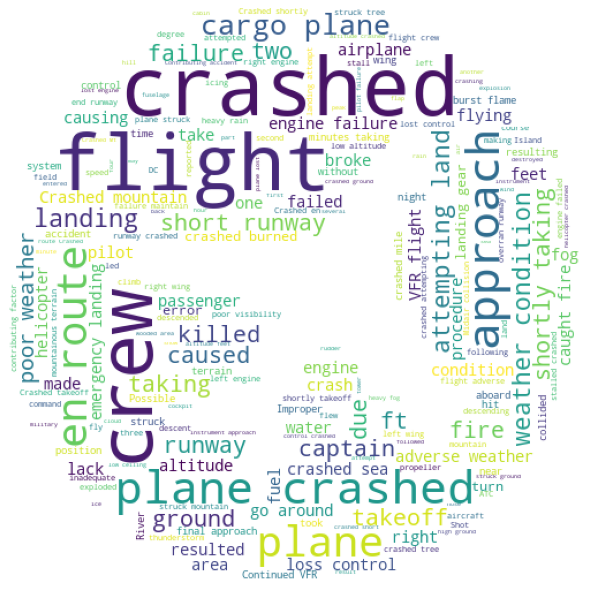

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

text = str(Data.Summary.tolist())
mask = np.array(Image.open(requests.get('https://c7.uihere.com/files/303/182/469/blue-airplane-icon-vector.jpg', stream=True).raw))

stopwords = set(STOPWORDS)
newStopword = ['aircraft', 'pilot', 'en route', 'airport']
stopwords.update(newStopword)
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    

generate_wordcloud(mask)

 **What is K-Means Clustering?**

K means Clustering is an unsupervised machine learning algorithm that aims to partition observations into clusters in which each observation belongs to the cluster with the nearest mean.

The k-means clustering algorithm mainly performs two tasks:



*   Determines the best value for K center points or centroids by an iterative process.
*   Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.



In an attempt to create meaningful definitive groups or "crash categories", the k means partitional clustering analysis technique will be applied to find similarities between airplane crashes based on: "Summary" of the Air-Crash.
Here,the number of clusters in which we have grouped the Summary are 7.(Hence the value of K = 7 in this Scenario). 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [ ]:
text_data = Data['Summary']
text_data = pd.DataFrame(text_data)

text_data

,Summary
0,"During a demonstration flight, a U.S. Army fly..."
1,First U.S. dirigible Akron exploded just offsh...
2,The first fatal airplane accident in Canada oc...
3,The airship flew into a thunderstorm and encou...
4,Hydrogen gas which was being vented was sucked...
...,...
5263,"While on approach, the military transport cras..."
5264,The cargo plane crashed while on approach to I...
5265,The Airbus went missing over the AtlantiOcean ...
5266,The air ambulance crashed into hills while att...


KMeans normally works with numbers only: we need to have numbers.To get numbers, we do feature extraction.

The feature we’ll use is TF-IDF, a numerical statistic. This statistic uses term frequency and inverse document frequency. The method TfidfVectorizer() implements the TF-IDF algorithm.

We will be removing any Stop-Words in the Data

In [ ]:
documents = list(text_data['Summary'])
vectorizer = TfidfVectorizer(stop_words='english') # Stop words are like "a", "the", or "in" which don't have significant meaning
X = vectorizer.fit_transform(documents)

In [ ]:
random_state = 0 
model = MiniBatchKMeans(n_clusters=7, random_state=random_state)
model.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=7, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

In [ ]:
model.predict(X)
model.labels_

array([3, 3, 3, ..., 3, 5, 2], dtype=int32)

In [ ]:
print ('Most Common Terms per Cluster:')

order_centroids = model.cluster_centers_.argsort()[:,::-1] #sort cluster centers by proximity to centroid
terms = vectorizer.get_feature_names()

for i in range(7):
    print("\n")
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]: #replace 10 with n words per cluster
        print ('%s' % terms[j]),
    print


Most Common Terms per Cluster:


Cluster 0:
midair
collision
aboard
killed
dc
exploded
avoid
cessna
bomb
aircraft


Cluster 1:
crashed
plane
approach
cargo
taking
runway
sea
short
shortly
aircraft


Cluster 2:
en
route
crashed
disappeared
mountain
cargo
plane
weather
mountains
aircraft


Cluster 3:
aircraft
pilot
crashed
flight
shot
altitude
crew
failure
conditions
terrain


Cluster 4:
mountain
weather
conditions
flew
poor
struck
vfr
crashed
adverse
flight


Cluster 5:
attempting
landing
land
crashed
runway
plane
emergency
struck
aircraft
attempt


Cluster 6:
engine
takeoff
failure
crashed
aircraft
plane
shortly
lost
right
failed


To visualize, we’ll plot the features in a 2D space. As we know the dimension of features that we obtained from TfidfVectorizer is quite large ( > 10,000), we need to reduce the dimension before we can plot. For this, we’ll ues PCA to transform our high dimensional features into 2 dimensions.

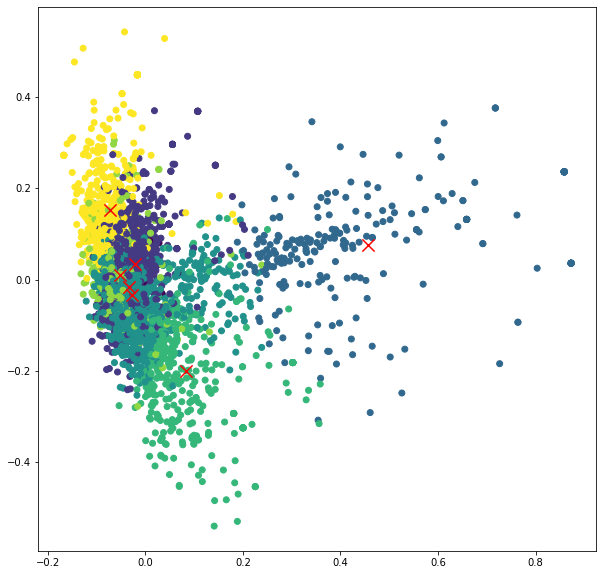

In [ ]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(X.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(model.cluster_centers_)
plt.rcParams["figure.figsize"] = (10,10)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=model.predict(X))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='r')





**Predicting which Cluster does The following Categories Belong to**

In [ ]:
print("Prediction")

Y = vectorizer.transform(["engine failure"])
prediction = model.predict(Y)
print(prediction)

Y = vectorizer.transform(["terrorism"])
prediction = model.predict(Y)
print(prediction)

Prediction
[6]
[3]


**INFERENCE:**


*   We can see that the category -"Engine Failure" belongs to Cluster 6
*   The category-"Terrorism" belongs to Cluster 3.



In [ ]:
df3=Data.copy()
df3=df3.assign(cluster=pd.Series(model.labels_))
df3.dropna(subset=["cluster"],inplace=True)

In [ ]:
CType = df3.groupby('cluster')['Fatalities','Aboard'].sum()
CType = CType.sort_values(by='Fatalities', ascending=True)
fig = px.bar(CType,x=CType["Fatalities"].index ,y=CType["Fatalities"],title="FATALITIES OF DIFFERENT CLUSTERS")
fig.update_traces(marker_color='lightcoral')
fig.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
CCt= df3.groupby(df3.cluster)[["cluster"]].count()
fig = px.bar(CCt,x=CCt["cluster"].index,y=CCt["cluster"],title="NUMBER OF CRASHES IN DIFFERENT CLUSTERS",labels=dict(index="Cluster number",cluster="Number of crashes"))
fig.update_traces(marker_color='lightcoral')
fig.show()


# **Question-4:** INTERESTING TRENDS AND BEHAVIOUR IN DATASET

**1.  9/11 TRAGEDY**

In [ ]:
Data["Ground"].max()

2750.0

In [ ]:
Data[Data["Ground"]==2750]

,Date,Time,Location,Operator,Type,Aboard,Fatalities,Ground,Summary
4803,09/11/2001,2001-09-11 08:47:00,"New York City, New York",AMERICAN AIRLINES,Boeing 767-223ER,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...
4804,09/11/2001,2001-09-11 09:03:00,"New York City, New York",UNITED AIR LINES,Boeing B-767-222,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...


In [ ]:
df=Data.copy()
df['Year'] = pd.DatetimeIndex(df['Date']).year
Gdy= df[['Year','Fatalities', 'Ground']].groupby('Year').sum()

fig=px.line(Gdy,x=Gdy["Ground"].index,y="Ground")
fig.show()

**INFERENCE:**




* As we can see from the Above Graph the number of peoples who were killed on the Ground due to Airplane crash  through the years 1908 to 2000  was in the range 0-300.
*  The year 2001 had the highest deaths in Ground accounting to about 5641 deaths,This dreadful number of people killed on the ground  was due to the tragic event of 9/11, where the Twin Towers were brought down by two planes hijacked by terrorists.  

* Some 2,750 people were killed in New York, 184 at the Pentagon, and 40 in Pennsylvania (where one of the hijacked planes crashed after the passengers attempted to retake the plane); All 19 terrorists died .The Attack was Co-ordinated by Osama-Bin-Laden



**2.Scatter Plot Matrix**

In [ ]:
fig = px.scatter_matrix(Data,
    dimensions=["Aboard", "Fatalities","Ground"],width=1000,height=1000)
fig.show()

**INFERENCE**


*   Here we are plotting Scatter Plot between three different variables namely Aboard,Ground and fatalities 
*   We can observe that Aboard and Fatalities are Highly-Corelated to each other.



In [ ]:

fig=px.imshow(Data.corr())
fig.update_layout(height=500,width=500)
fig.show()

**3.Predicting Fatalities using the values of Aboard with Regression Line**

In [ ]:
fig = px.scatter(Data, x="Aboard", y="Fatalities", trendline="ols",trendline_color_override="red")
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



**INFERENCE:**


*  Here we are finding the Regression Line using Ordinary Least-Squares approach 
* Fatalities is the Dependent Variable and Aboard is the Predictor Variable
*The Regression line in the above scenario is
       Fatalities= 0.588 * Aboard + 4.03187





**4.Predicting number of Crashes in Future using Regression Line**

In [ ]:
Temp = Data.groupby(Data.Time.dt.year)[['Date']].count() 
Temp = Temp.rename(columns={"Date": "NOC"})

fig = px.scatter(Temp,x=Temp["NOC"].index,y="NOC",trendline="ols",trendline_color_override="red",labels=dict(NOC="NUMBER OF CRASHES",Time="YEAR"))
fig.show()



**INFERENCE:**


*   Here We are Predicting the number of Crashes in the Upcoming Years using the Regression Line ,which we have found using OLS approach
*   The Regression Line in the above Scenario is 
        Count = 0.788 * Time - 1496.19



**5.Trend of Crashes and Fatalities Per Crash (FPC) Over the Years**

In [ ]:

a = Data.groupby(Data.Time.dt.year).size()
a=pd.DataFrame(a)
a.rename(columns={0: 'Crashes'}, inplace=True)

b = Data.groupby(Data.Time.dt.year)['Fatalities'].mean()
b=pd.DataFrame(b)
b.rename(columns={'Fatalities': 'FPC'}, inplace=True)


df = b.join(a, how='inner', on="Time")
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=df["Crashes"].index, y=df["Crashes"], name="Crashes"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=df["Crashes"].index, y=df["FPC"], name="FPC"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="TREND OF CRASHES AND FATALITY PER CRASH OVER THE YEAR"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Crashes</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>FPC</b> ", secondary_y=True)

fig.show()

**INFERENCE:**


* From the above Graph we can see that Number of Crashes  and FPC increased    rapidly over the Time-Period 1908-1972

*   There have been 552 such incidents, including terrorist or other attacks. Of these, 204 have involved at least 100 fatalities, 34 have had at least 200 fatalities, 8 have had at least 300 fatalities, and 4 have had at least 500 fatalities. Between 1923 (the first year an aircraft accident or incident exceeded 50 fatalities) and the present, these incidents have accounted for 58,144 fatalities across all seven continents and the three largest oceans.
*After 1972 , the number of Crashes and FPC are decreasing over the Years
* The First Air-Crash was recorded in the Year 1908.During flight trials to win a contract from the U.S. Army Signal Corps, pilot Orville Wright and passenger Lt. Thomas Selfridge crashed in a Wright Flyer at Fort Myer, Virginia. Wright was injured, and Selfridge became the first passenger to die in an airplane accident.
*The Year 1972 is Considered to be the Deadliest year in Commercial Aviation , about 2,313 People were killed in Aviation accidents




**6.Crashes by Aeroflot Over the Years**

In [ ]:
Aeroflot = Data[Data.Operator == 'AEROFLOT']

Count_by_Year = Aeroflot.groupby(Data.Time.dt.year)[['Date']].count()
Count_by_Year = Count_by_Year.rename(columns={"Date": "Count"})

fig=px.line(Count_by_Year,x=Count_by_Year.index,y="Count")
fig.show()

**INFERENCE:**




*   Founded in 1923, Aeroflot, the flag carrier and largest airline of Russia (and formerly the Soviet Union) (formerly the world's largest airline), has had a high number of fatal crashes, most occurring during the Soviet era. 


*   According to the Aircraft Crashes Record Office, 8,231 passengers have died in Aeroflot crashes, about five times more than any other airline.From 1946 to 1989, the carrier was involved in 721 incidents. However, from 1995 to 2017, the carrier was involved in 10 incidents. In 2013,five of the ten aircraft models involved in the highest numbers of fatal accidents were old Soviet models.

*   Even so the number of crashes and fatalities is increasing, the number of flights is also increasing. And we could actually see that the ratio of fatalities/total amount of passengers trending down (for 2000s). However we can not make decisions about any Operator like "which airline is much safer to flight with" without knowledge of total amount flights. If Aeroflot has the largest number of crashes this doesn't mean that it is not worse to flight with because it might have the largest amount of flights



# **CONCLUSION**




1.   Due to two World Wars and due to the problems in aviation in mid 70's and 80's resulted in huge number of airplane crashes and casualities.
2.   After 1980, problems with aviation were reduced so, there is drop in crashes and fatalities and made the airways safe to travel.






